In [95]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from pathlib import Path
import os
    
def show_images(model_type, images_path, csv_path):
    df = pd.read_csv(csv_path).sort_values('rmse')
    df = pd.concat([df.head(1), df.tail(1)])
    base_dir = Path(images_path)

    for _, row in df.iterrows():
        model = row['model']
        sample = row['sample']
        day = row['day']
        rmse = row['rmse']
        
        true_path = base_dir / f"{model}/sample{sample}_day{day}_true.png"
        pred_path = base_dir / f"{model}/sample{sample}_day{day}_pred.png"
        
        if not true_path.exists() or not pred_path.exists():
            print(f"Missing images for {model} sample{sample} day{day}")
            continue
        
        true_img = mpimg.imread(true_path)
        pred_img = mpimg.imread(pred_path)
        
        fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(8, 4))
        plt.subplots_adjust(wspace=0.3, top=0.85, bottom=0.15)
        
        ax1.imshow(true_img)
        ax1.axis('off')
        ax1.set_title('Truth', fontsize=8)
        
        ax2.imshow(pred_img)
        ax2.axis('off')
        ax2.set_title('Prediction', fontsize=8)
        
        fig.suptitle(f"{model_type}-{model} day{day} RMSE: {rmse:.4f}", 
                    fontsize=10, y=0.05, va='bottom')
        
        plt.show()
        plt.close()

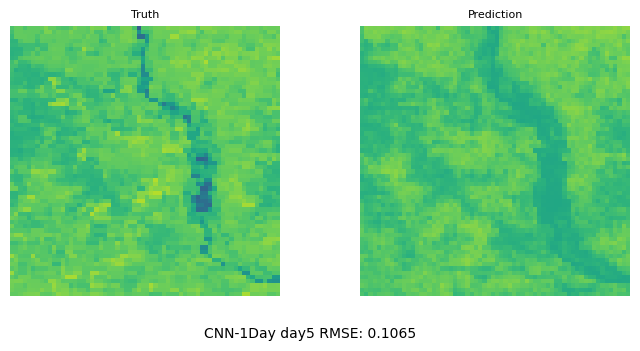

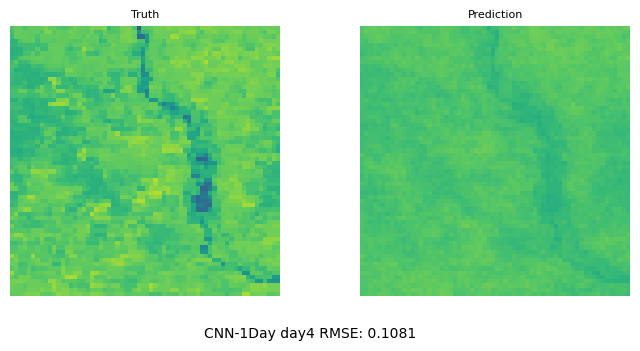

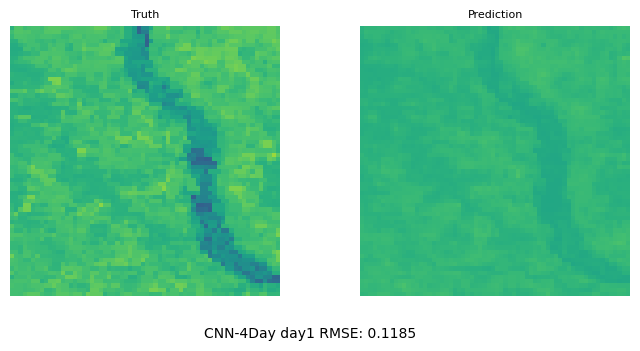

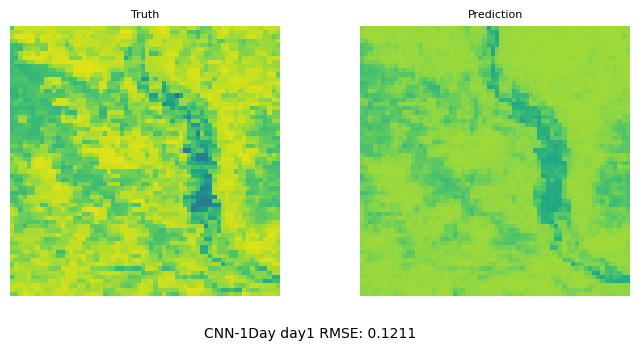

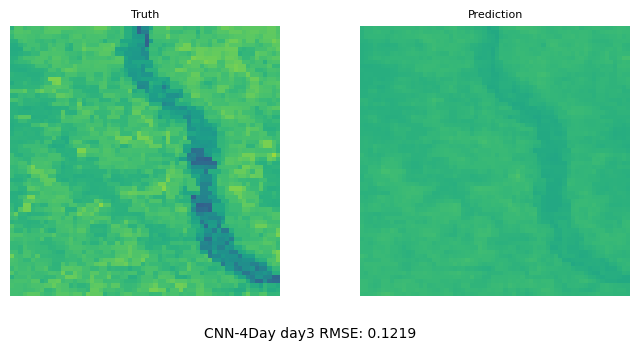

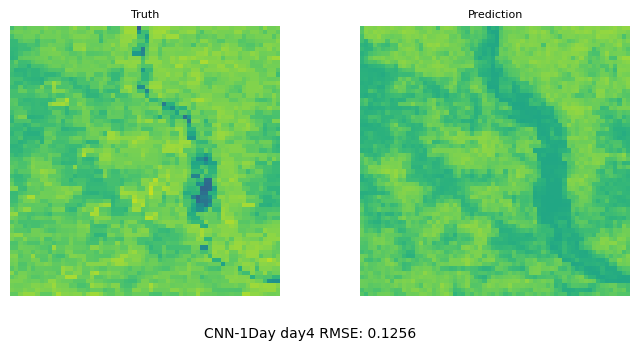

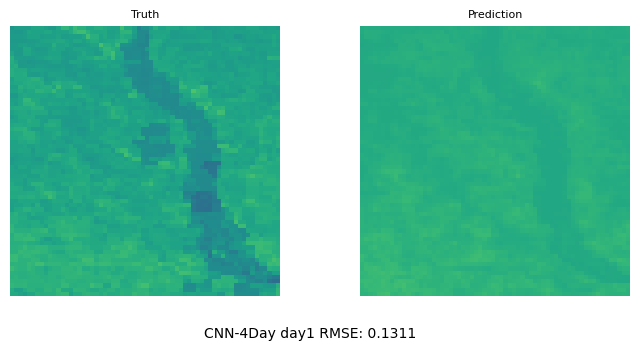

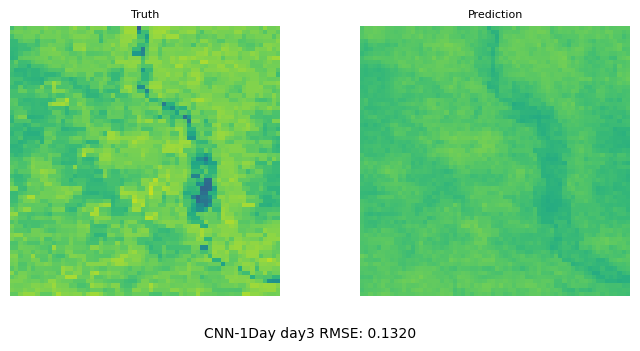

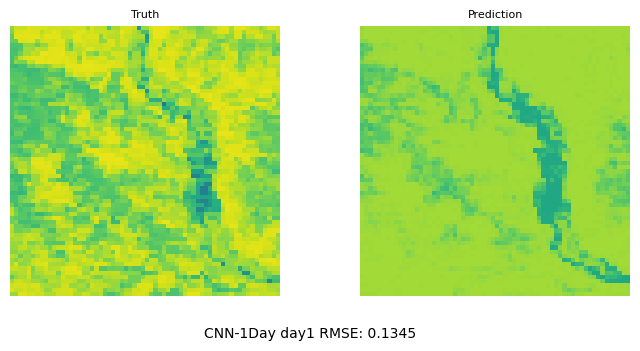

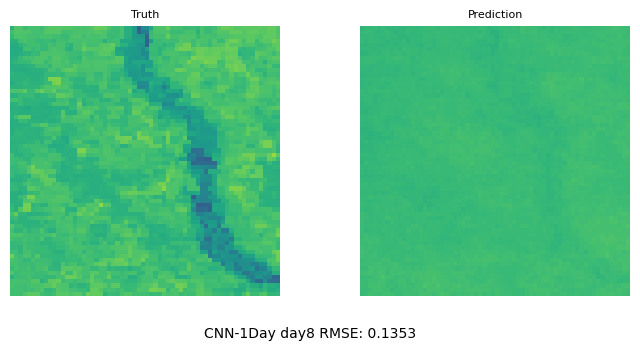

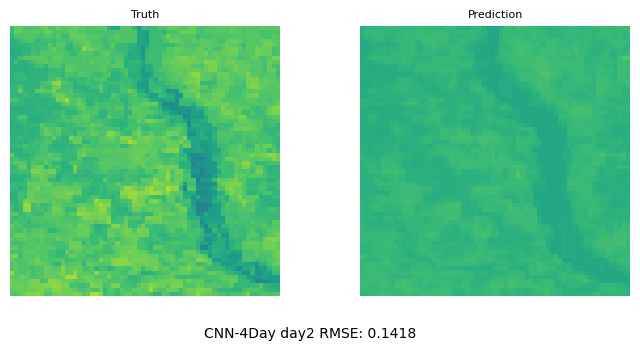

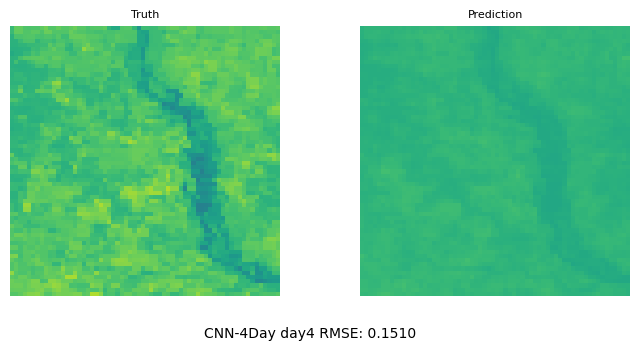

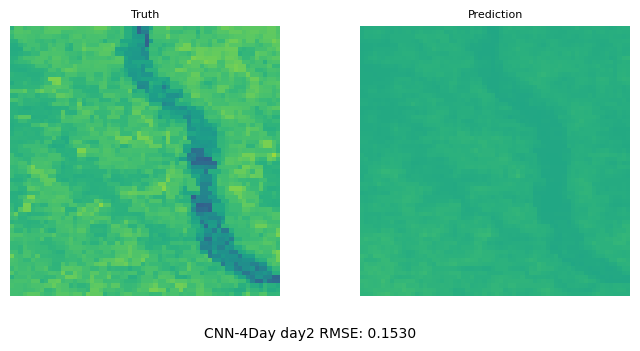

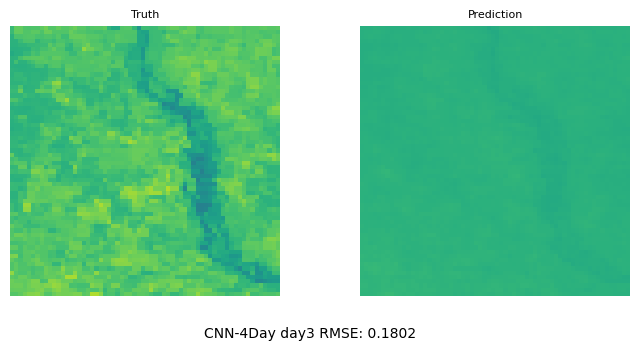

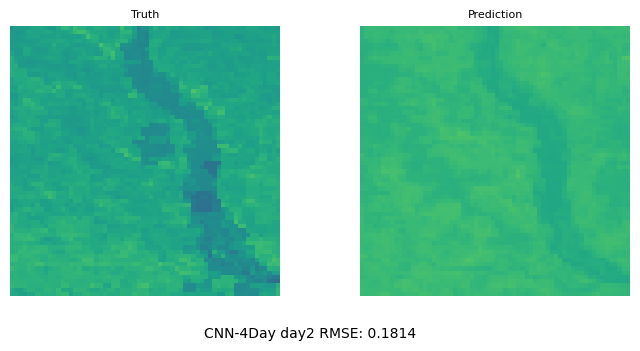

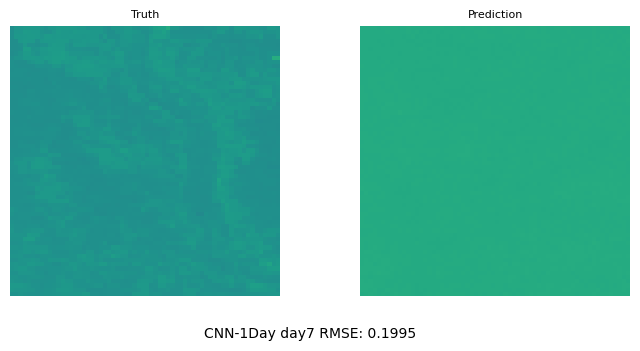

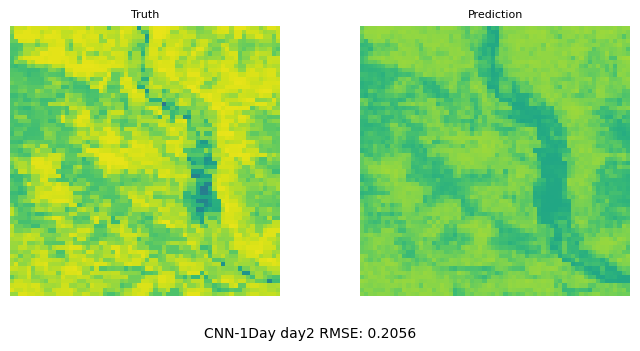

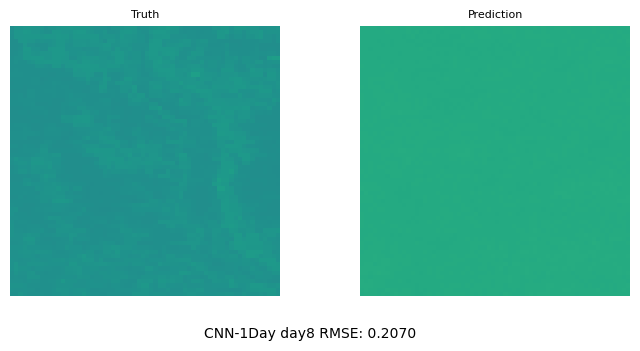

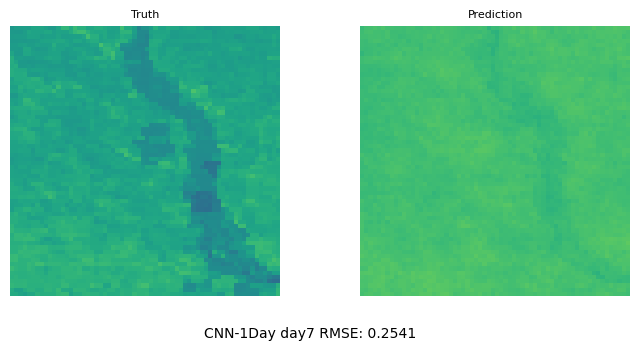

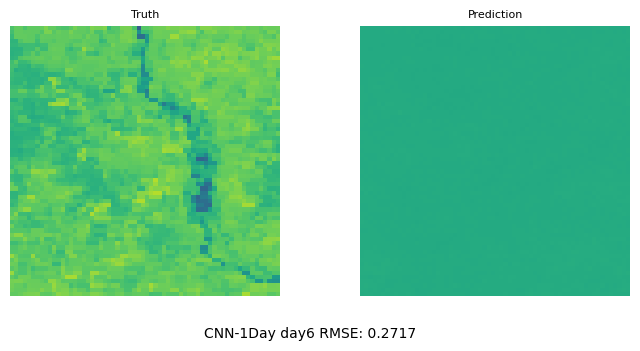

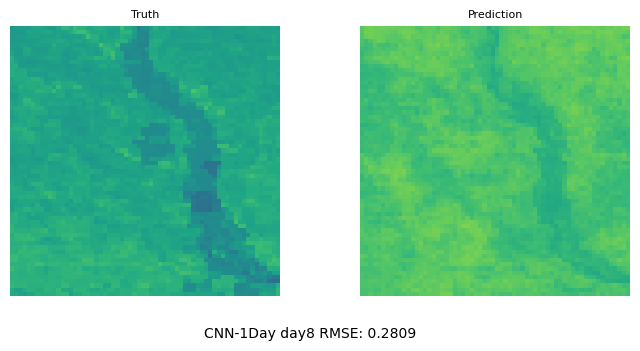

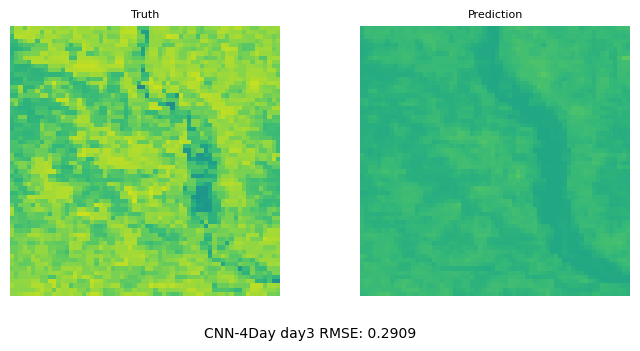

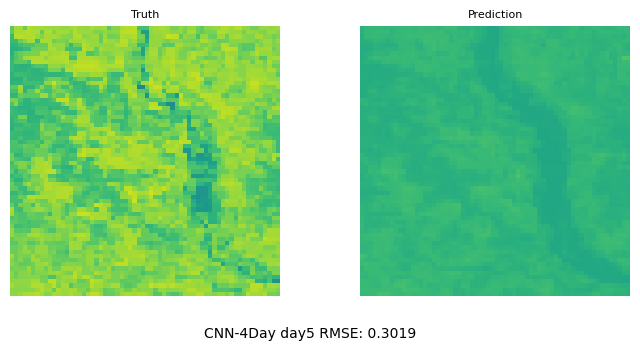

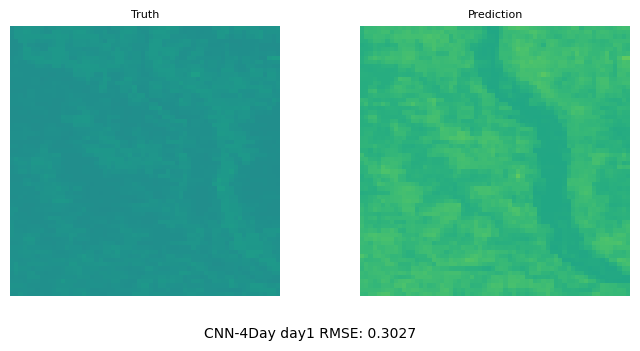

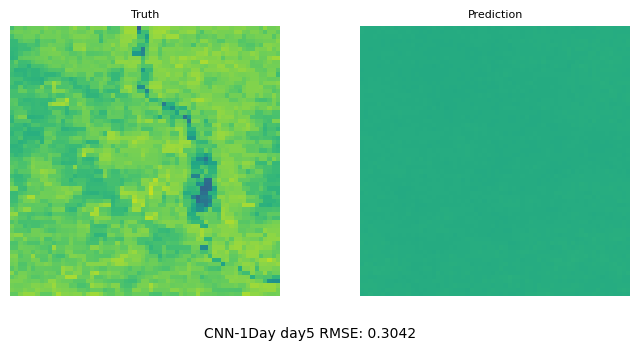

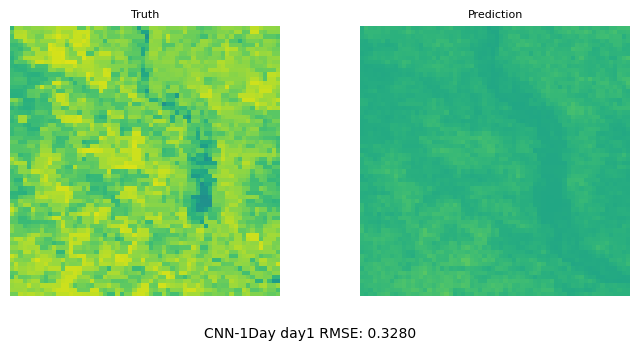

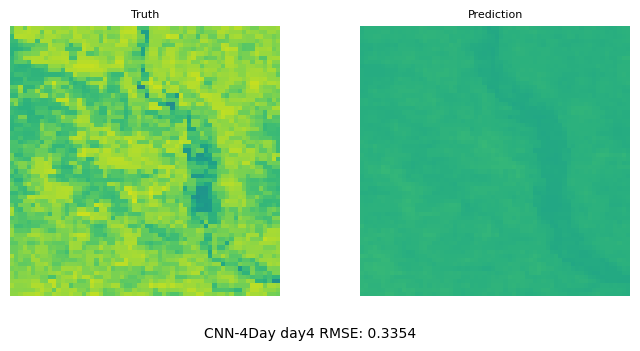

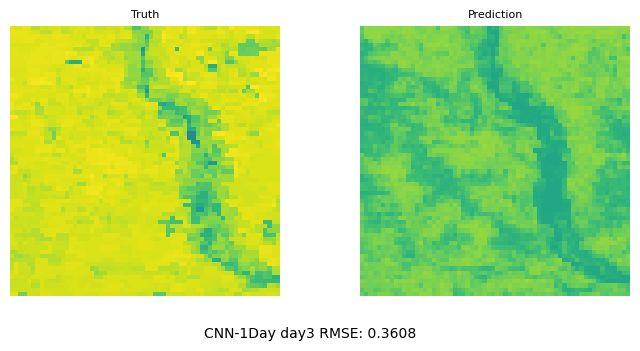

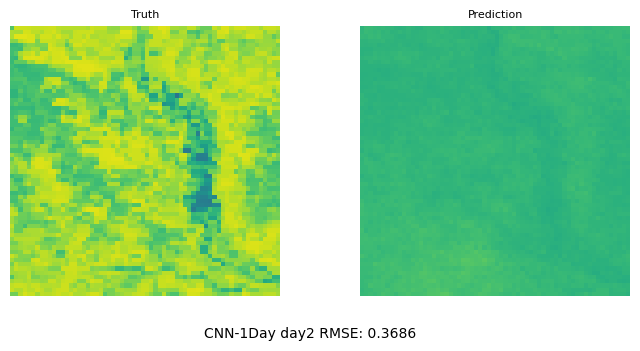

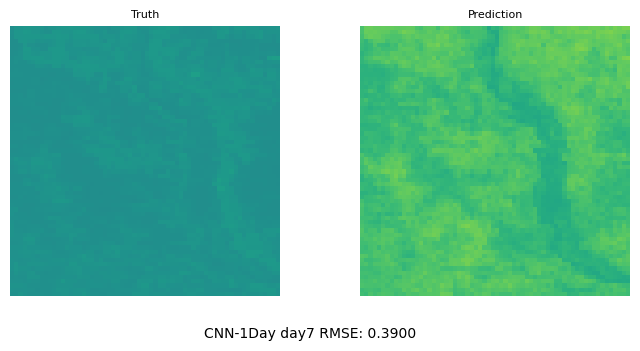

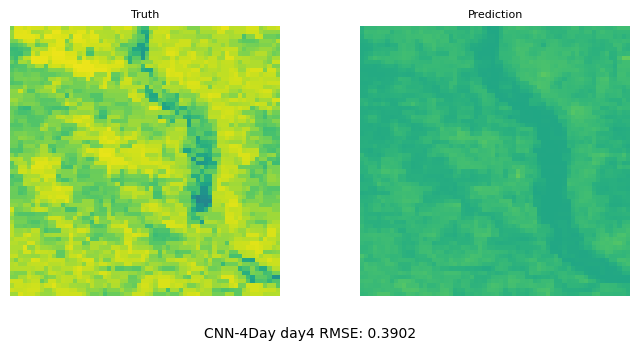

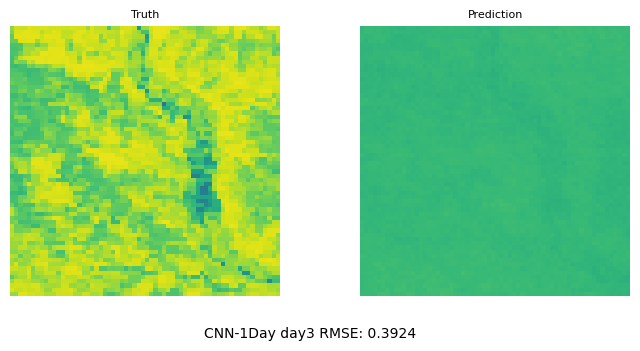

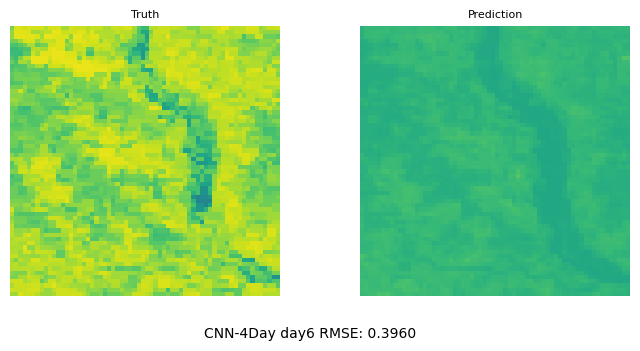

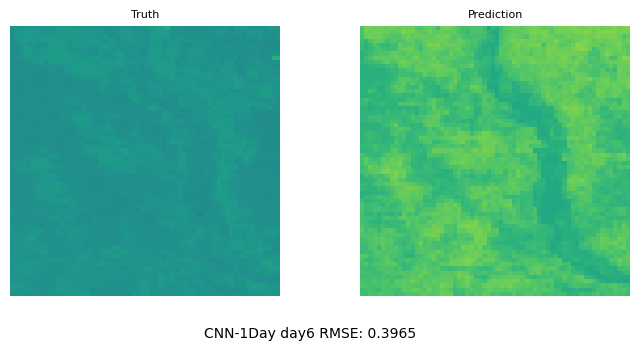

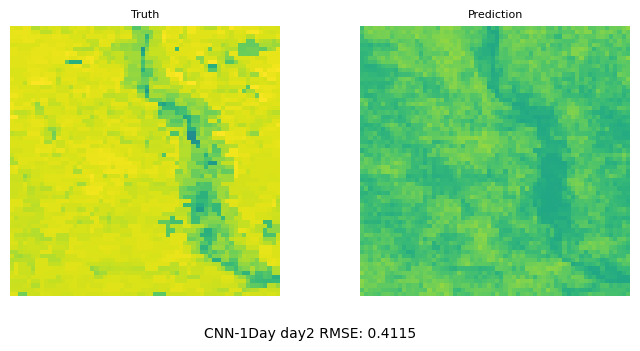

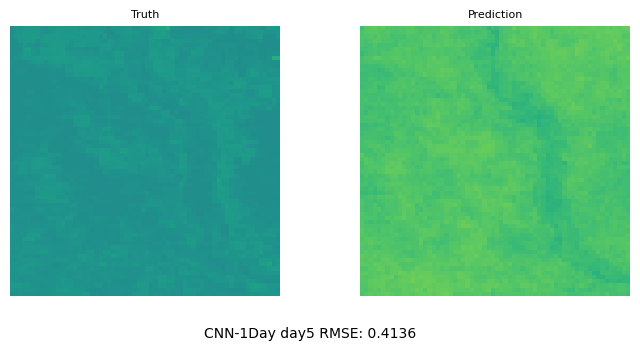

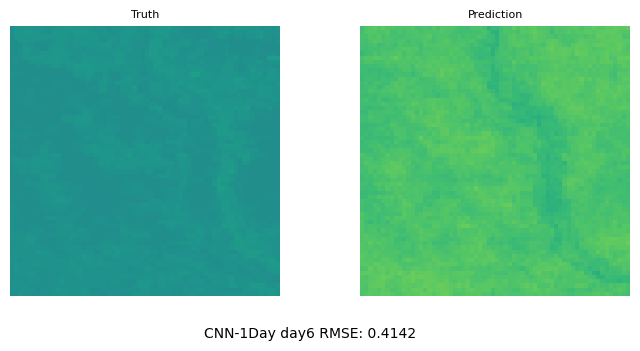

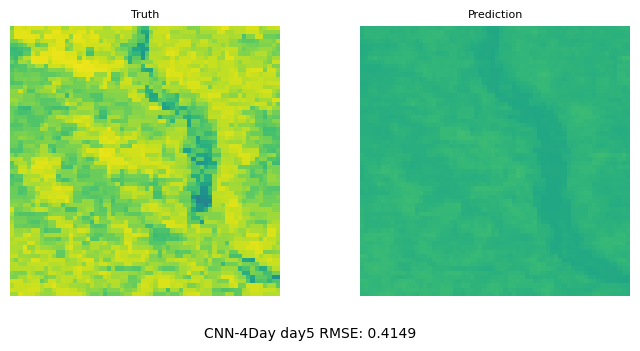

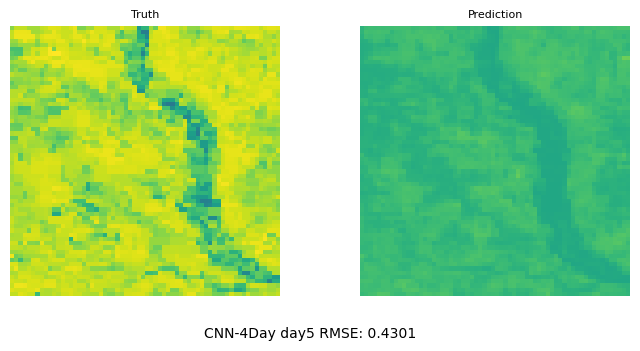

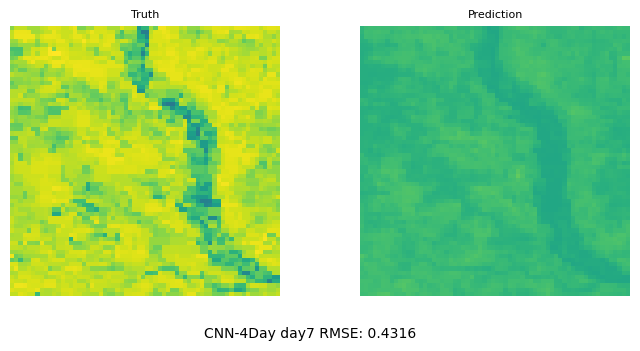

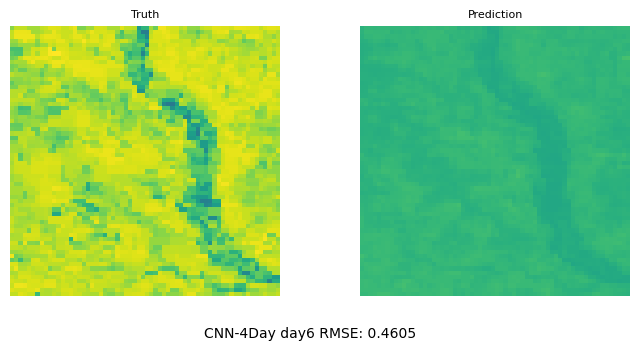

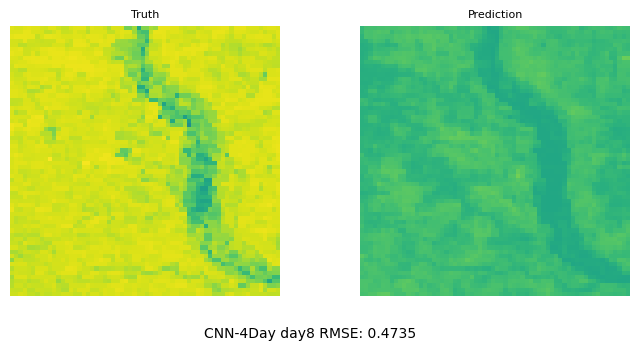

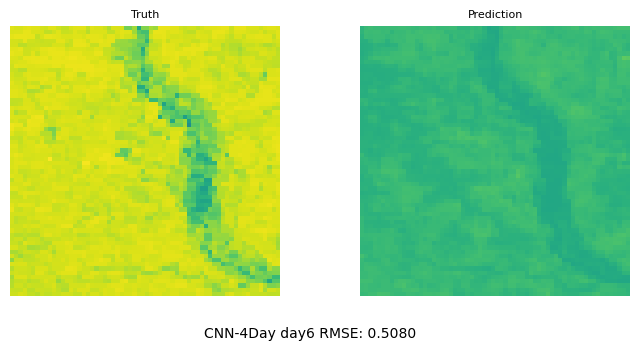

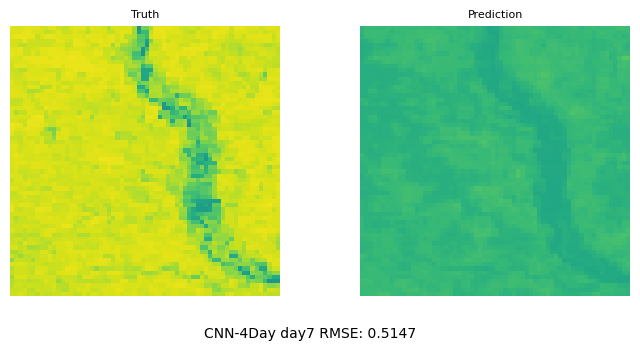

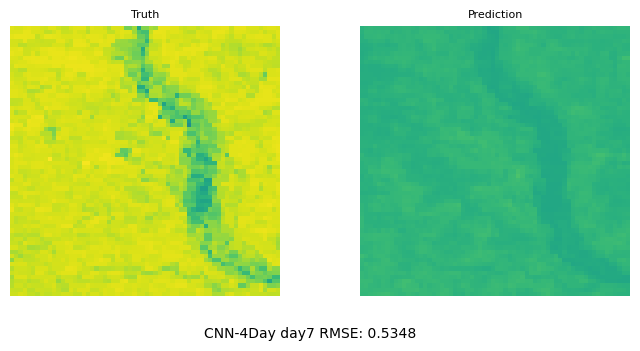

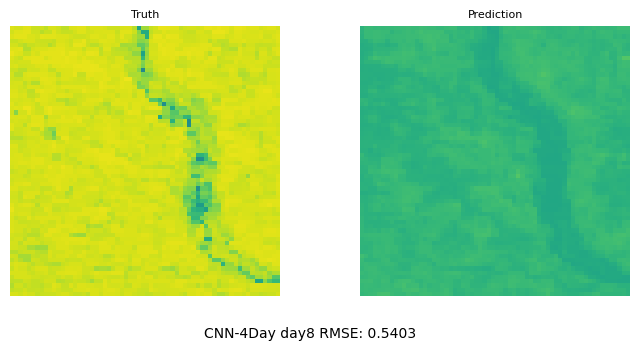

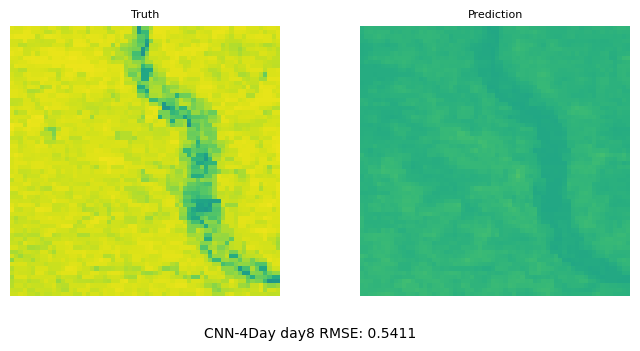

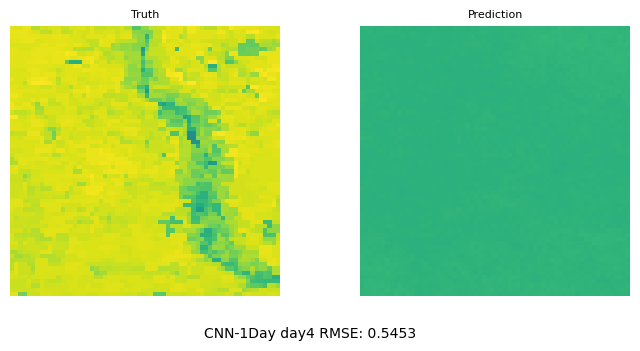

-----------------------------------------------------------------------------------------------


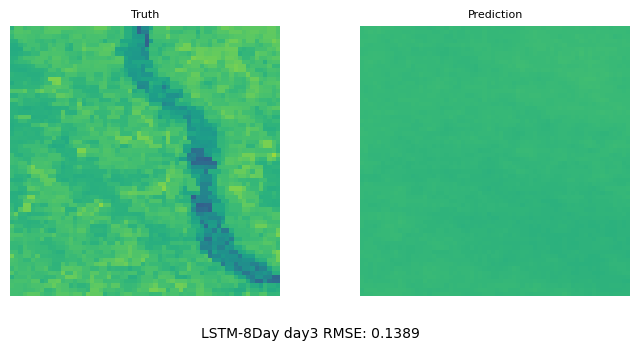

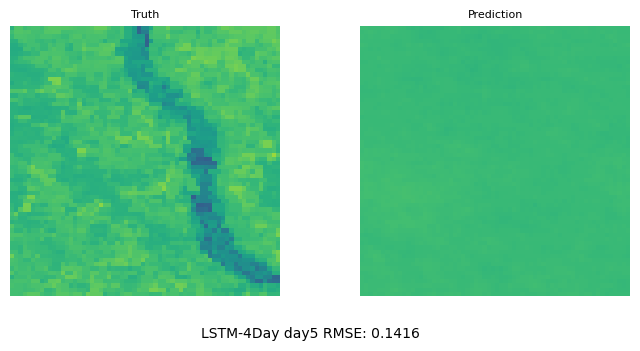

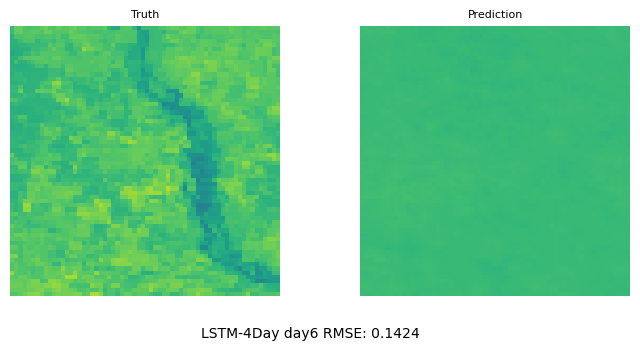

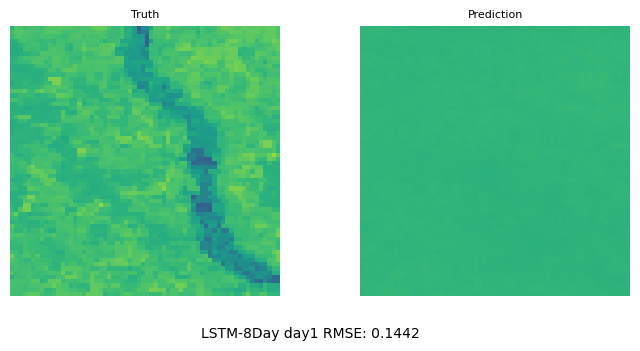

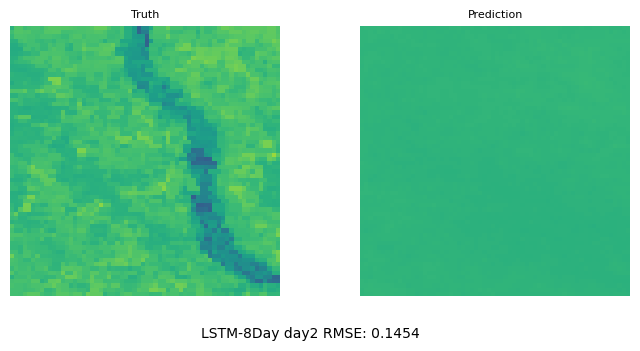

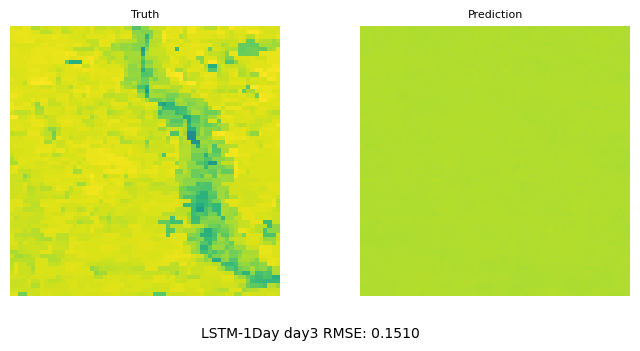

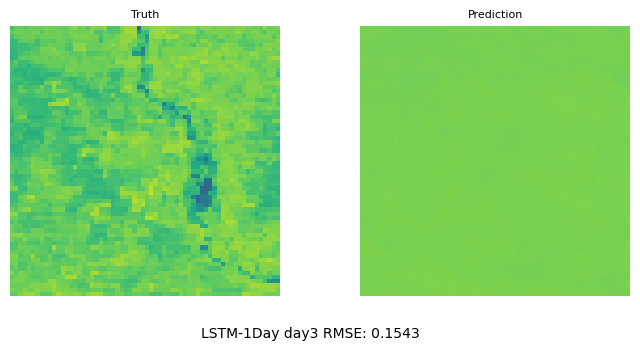

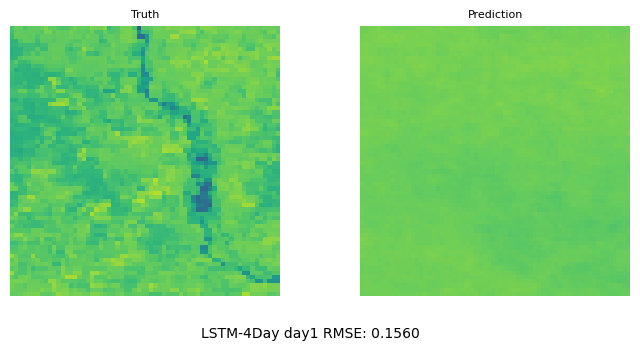

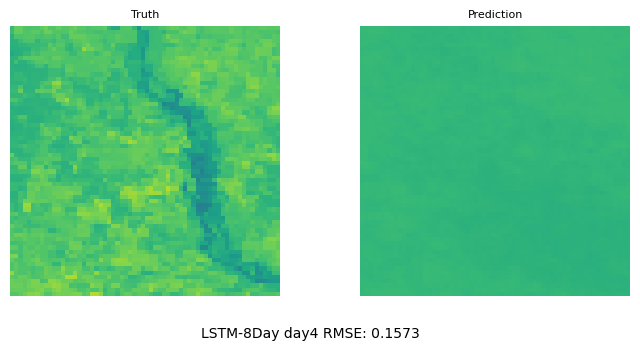

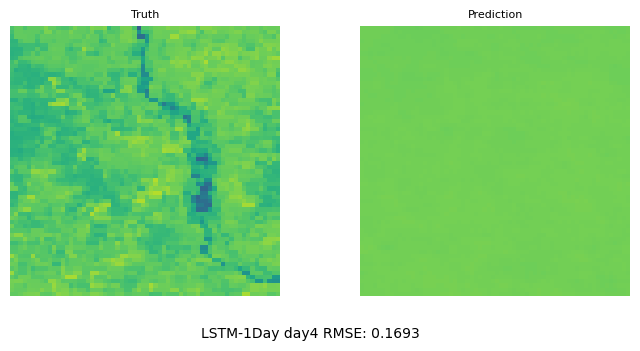

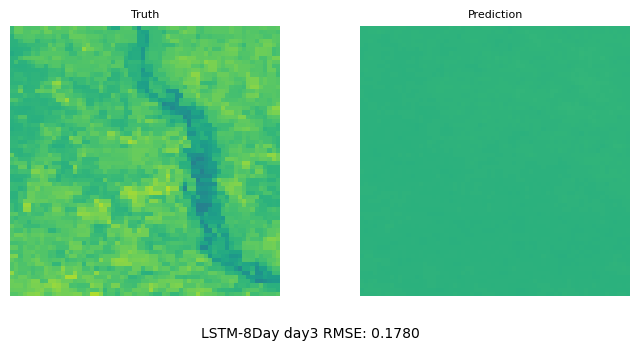

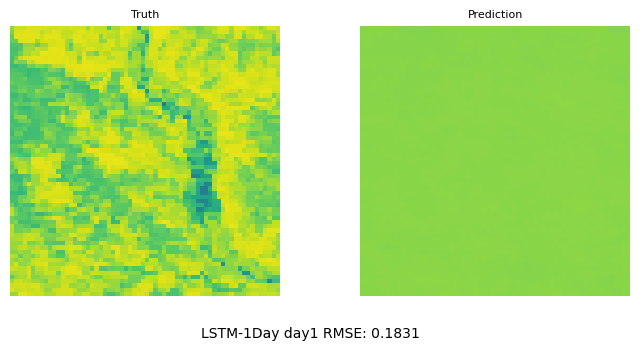

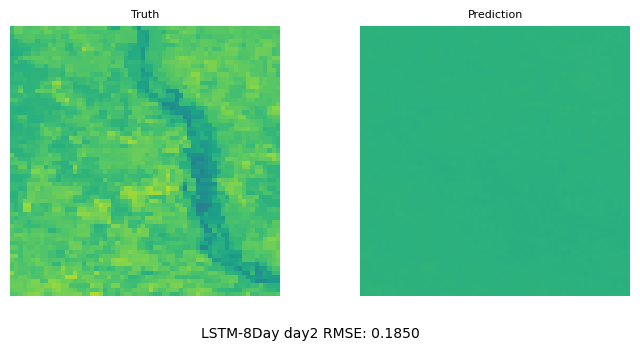

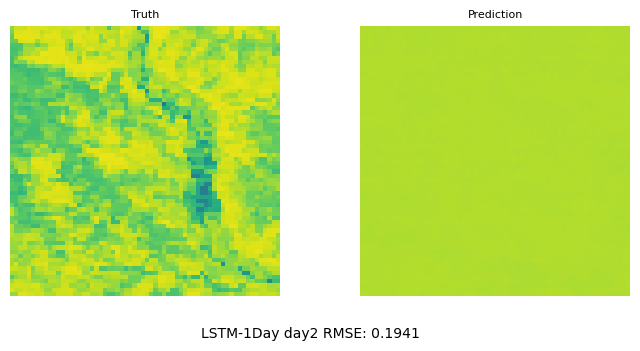

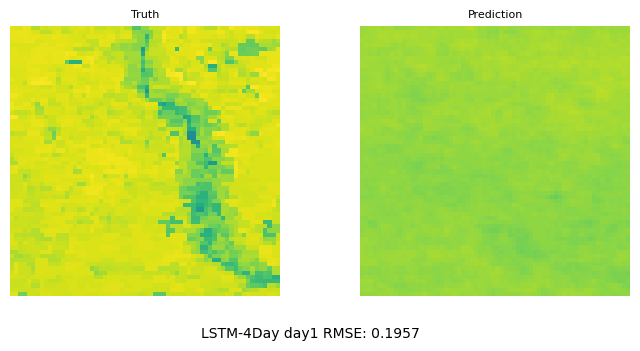

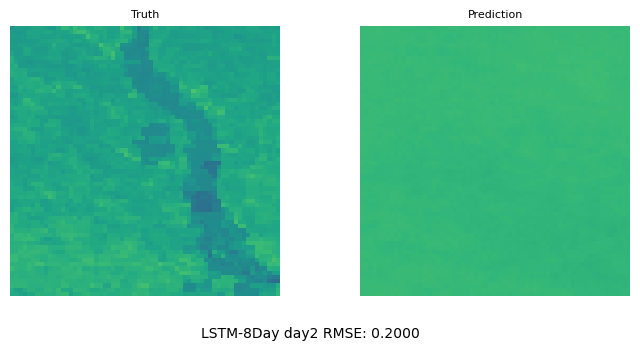

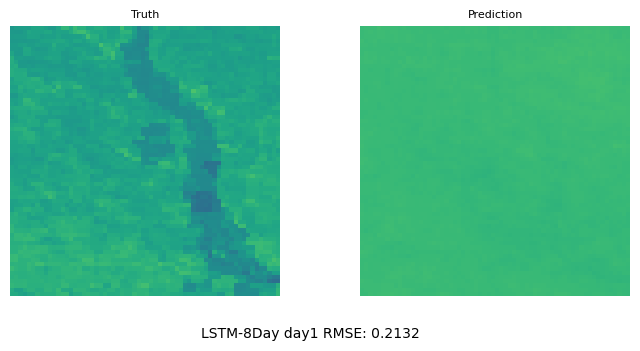

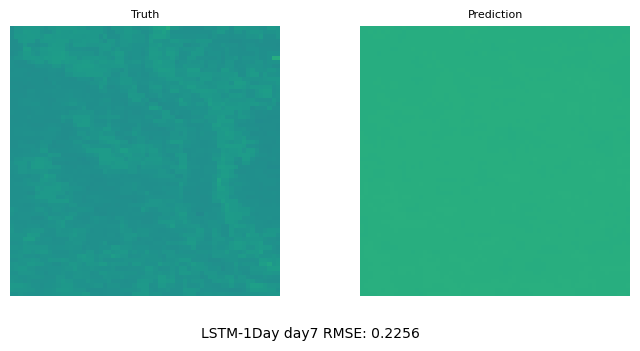

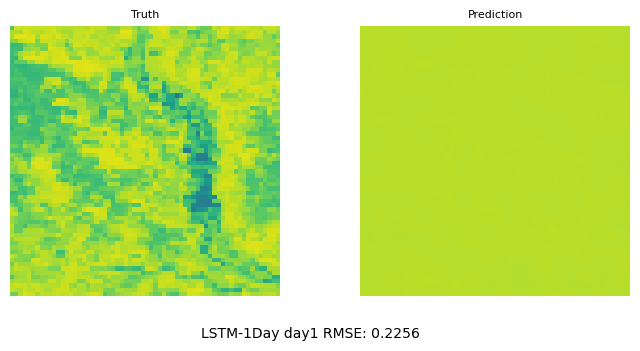

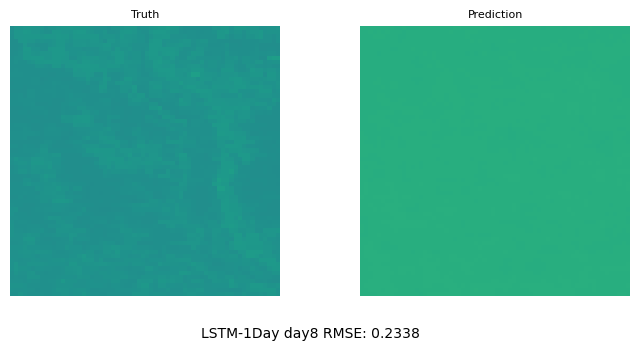

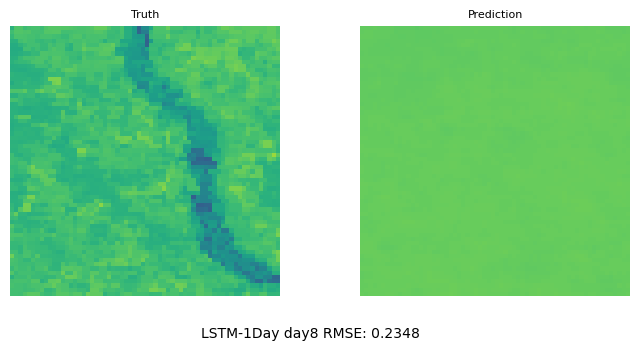

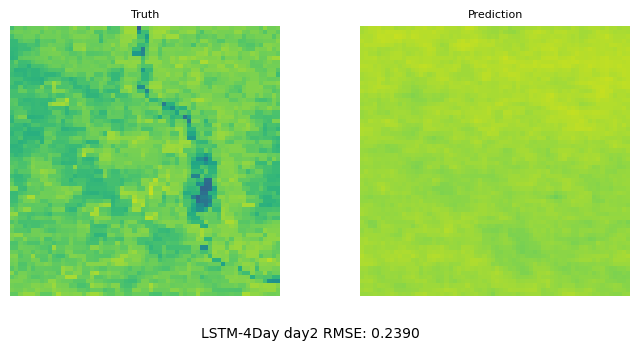

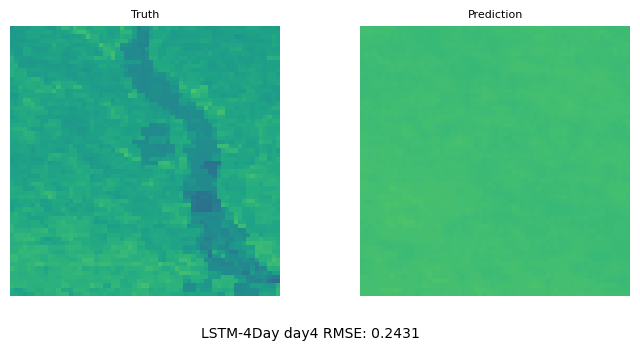

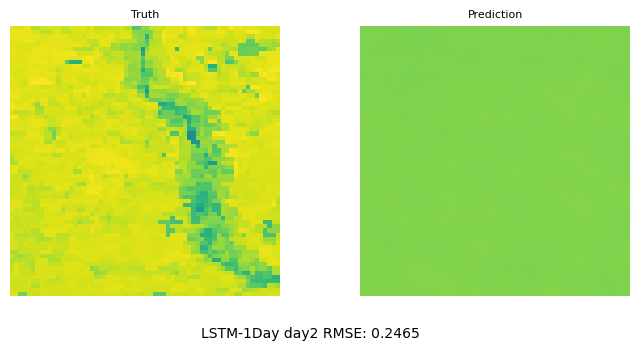

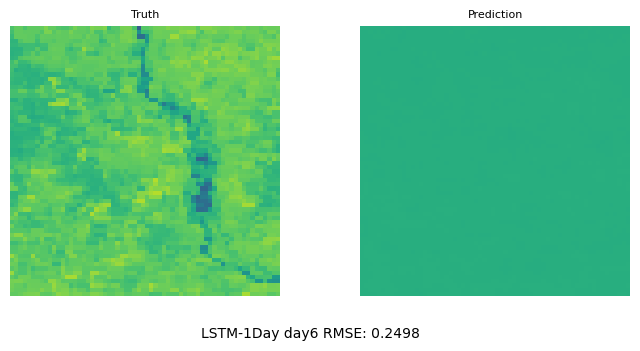

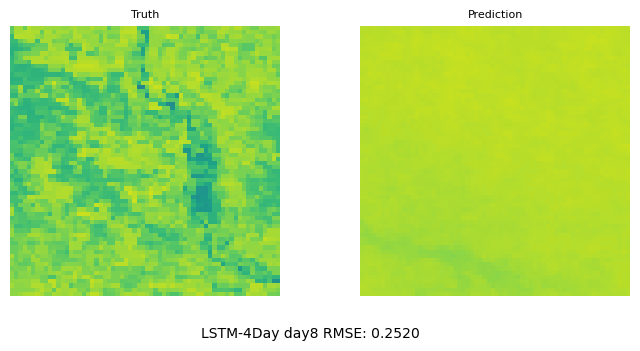

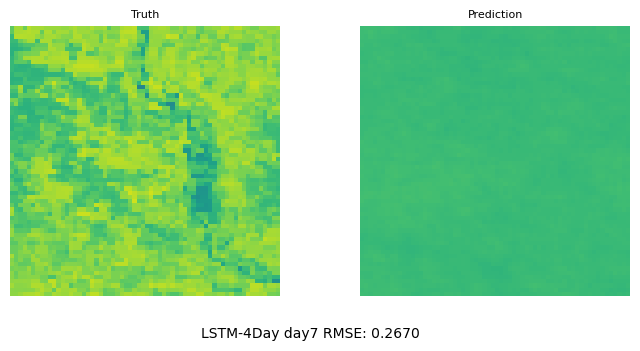

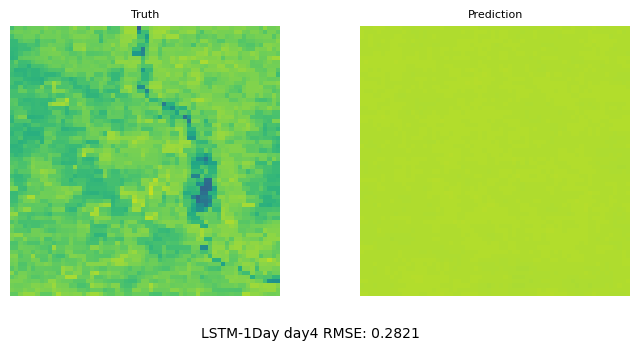

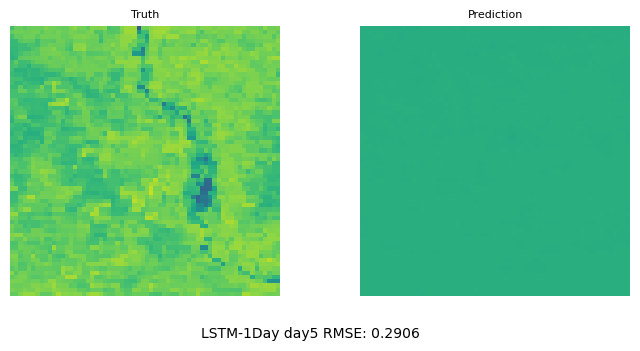

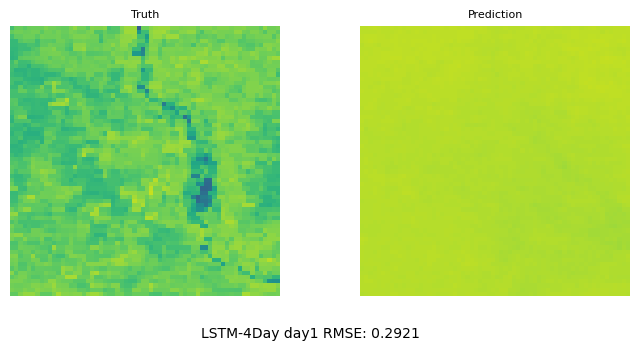

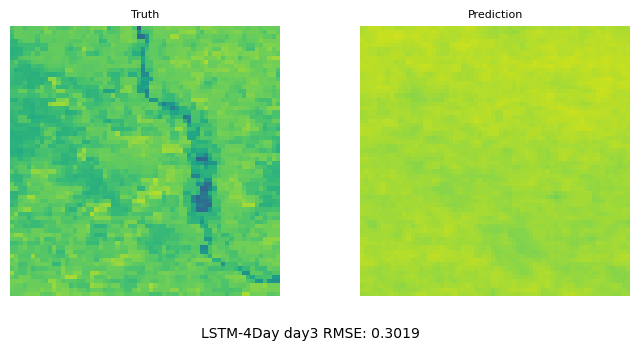

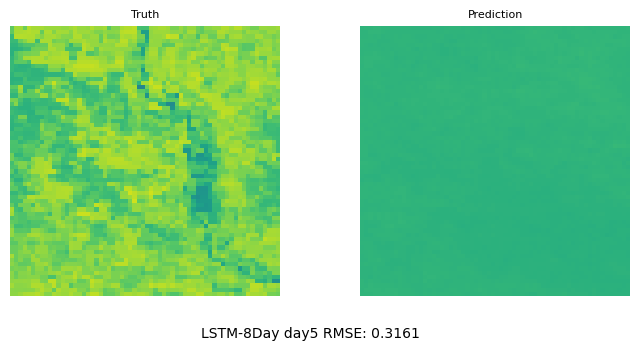

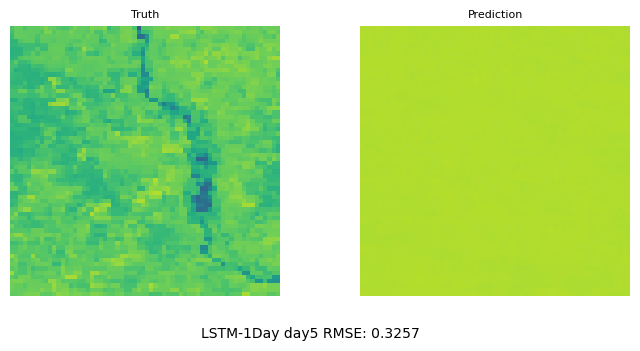

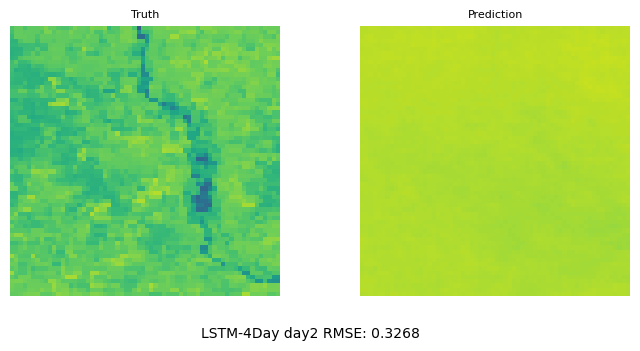

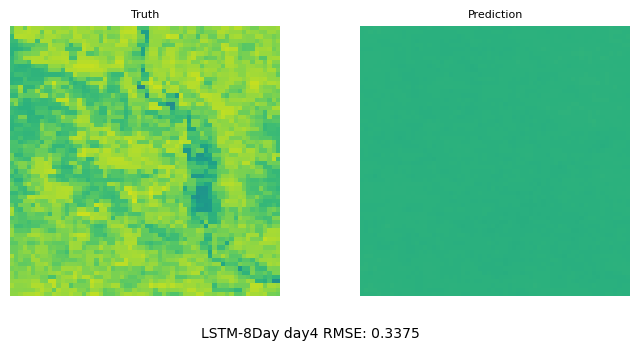

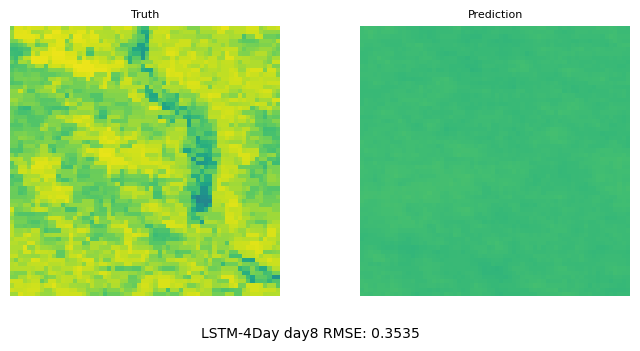

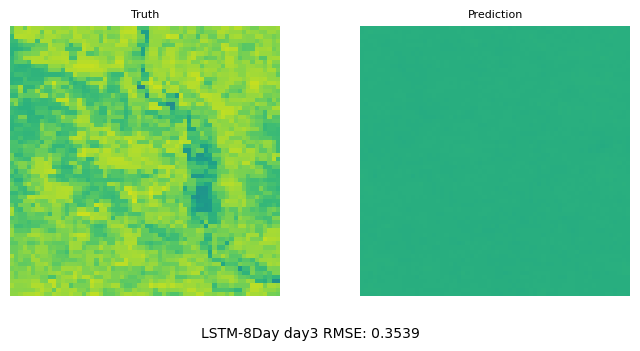

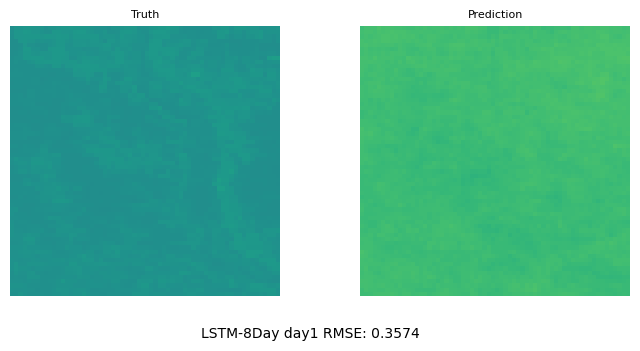

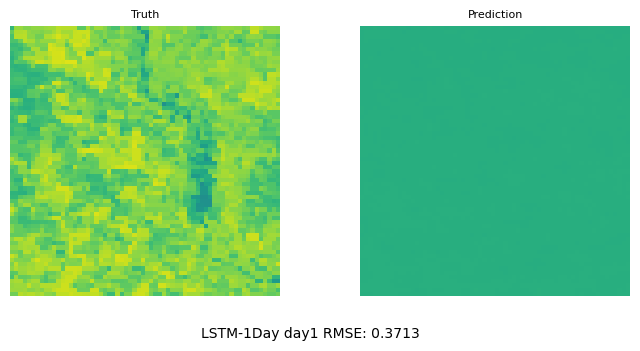

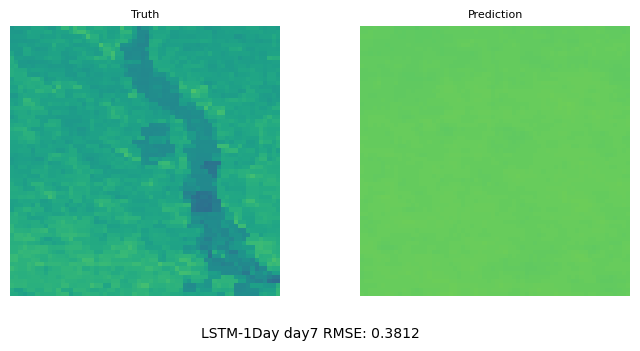

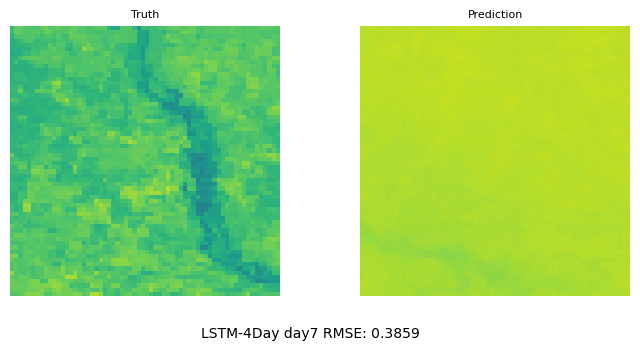

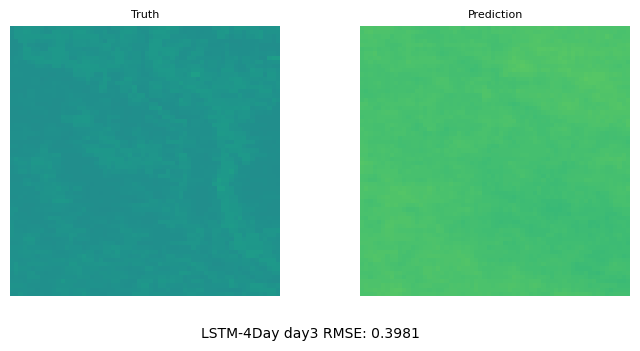

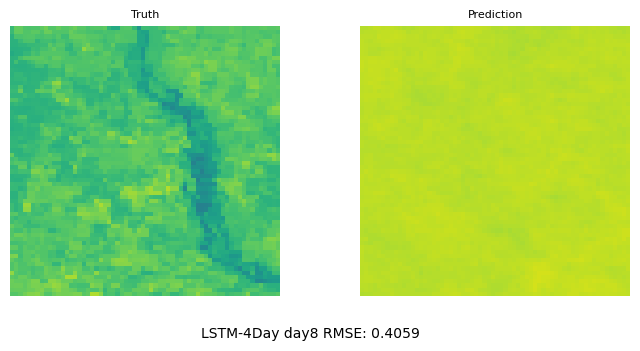

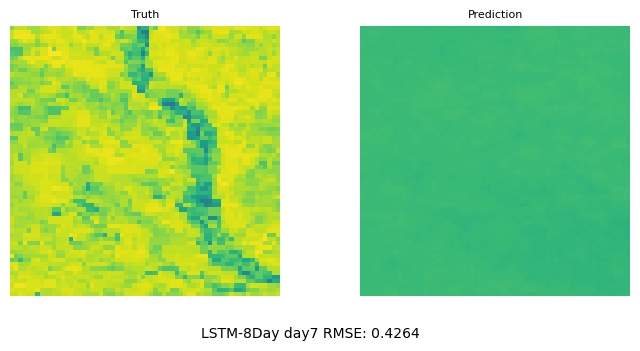

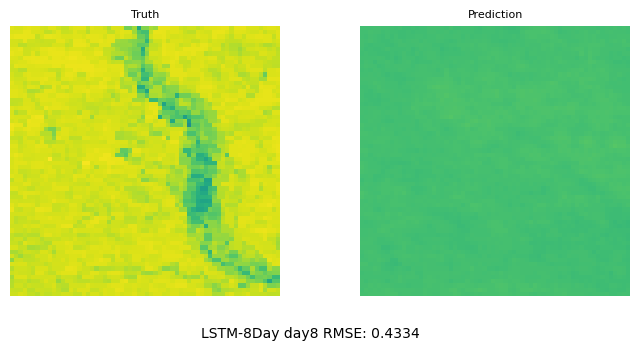

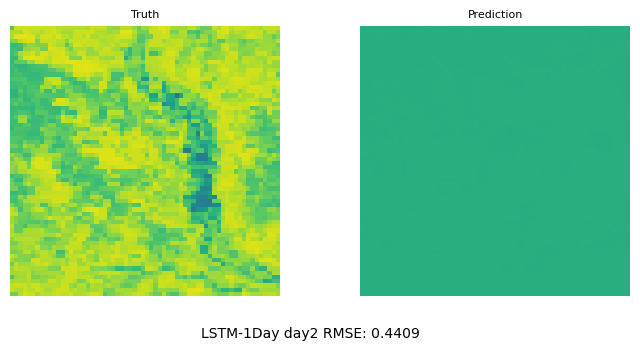

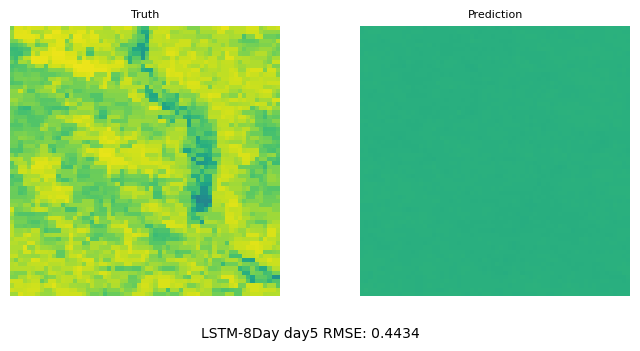

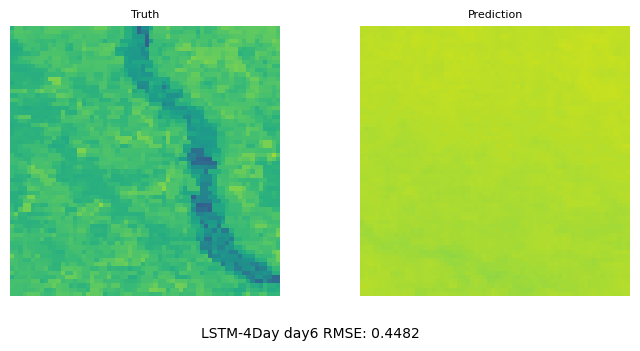

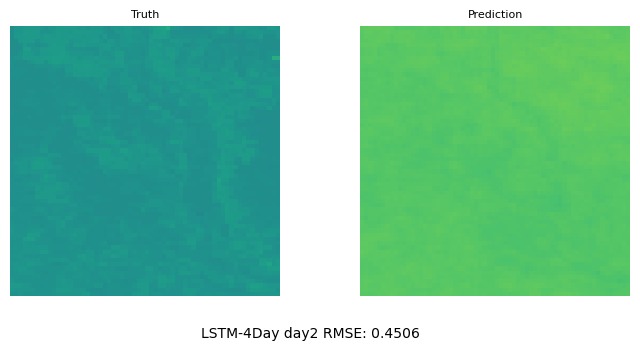

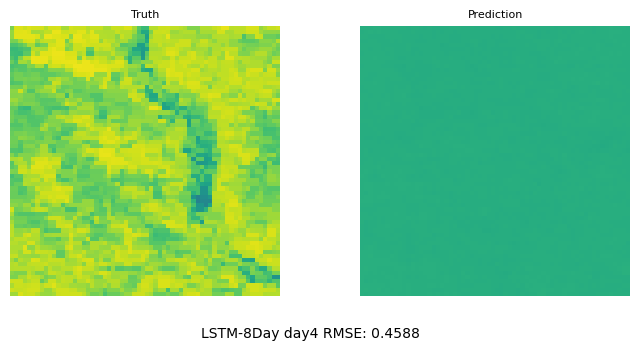

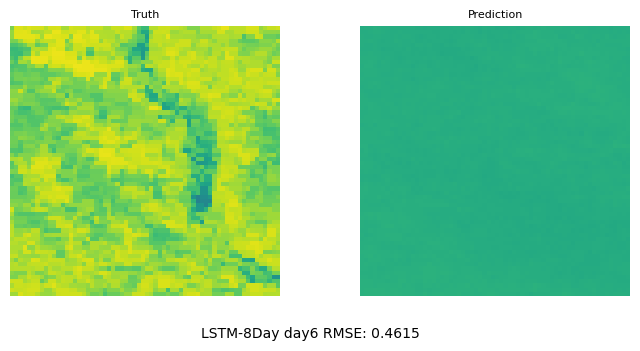

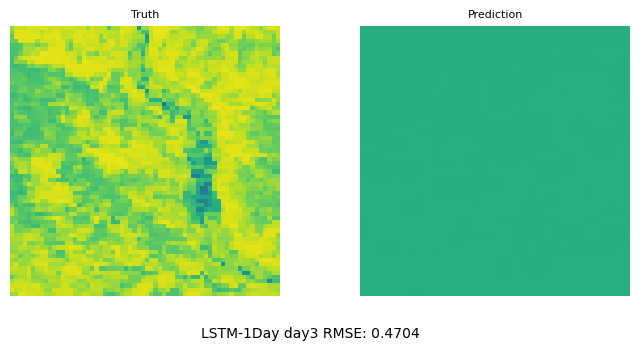

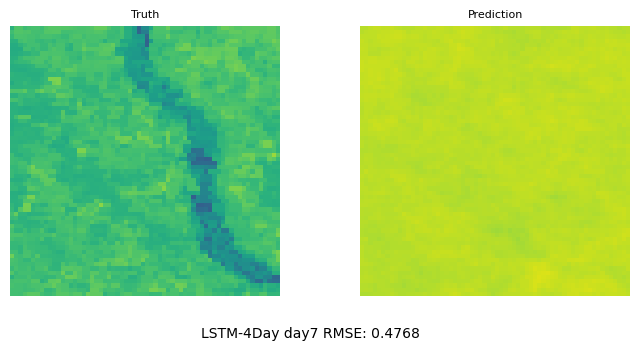

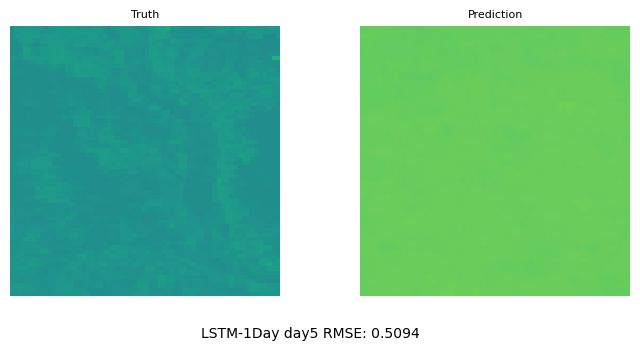

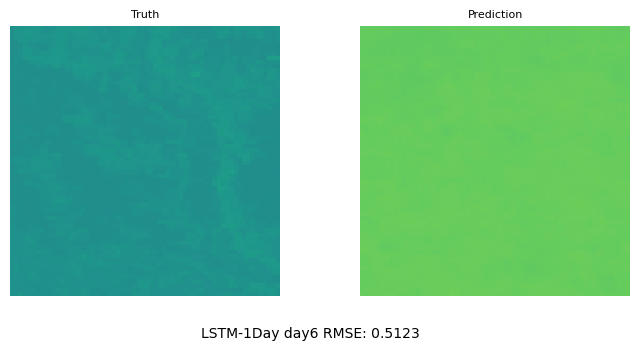

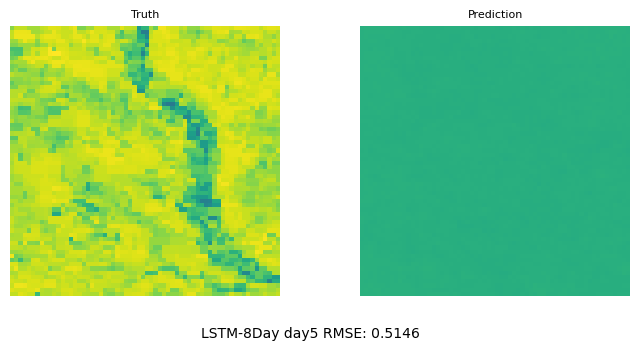

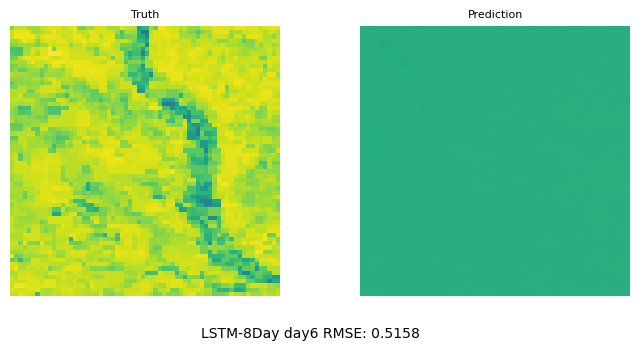

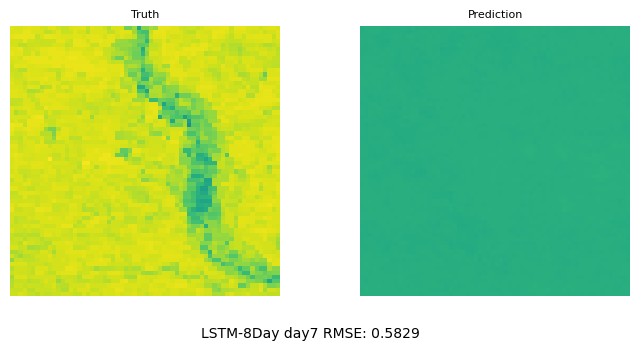

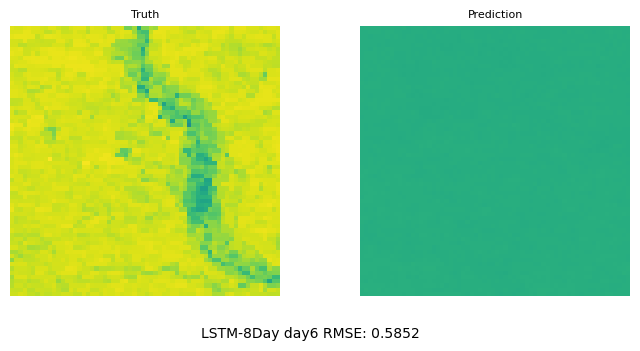

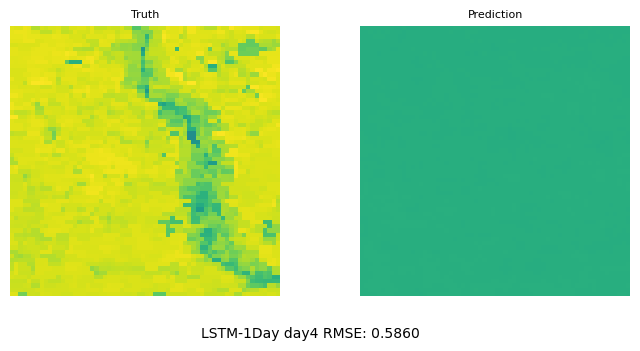

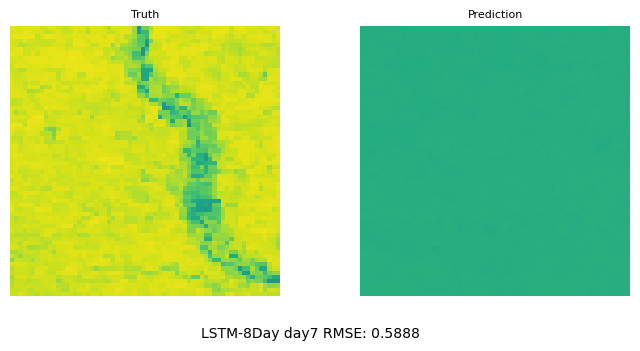

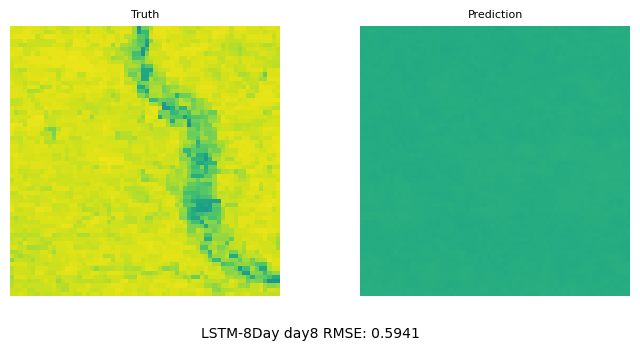

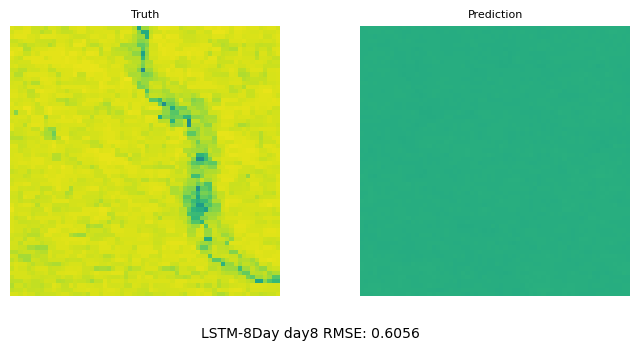

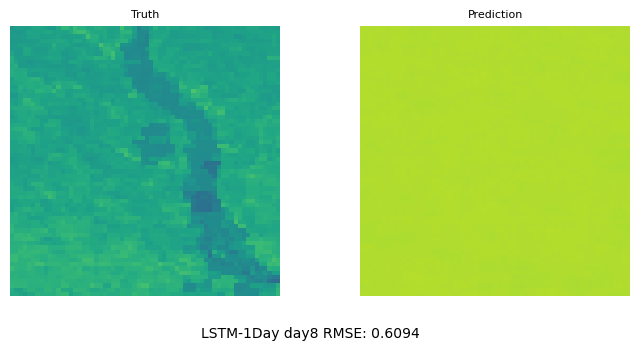

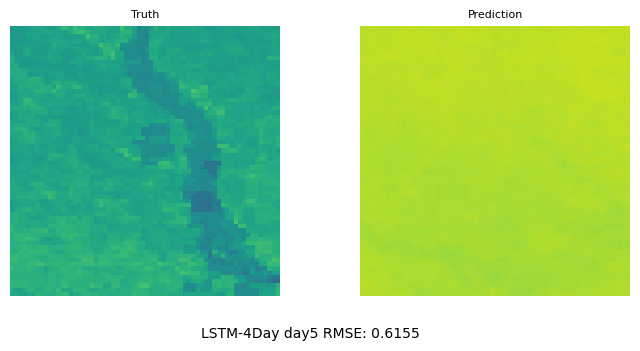

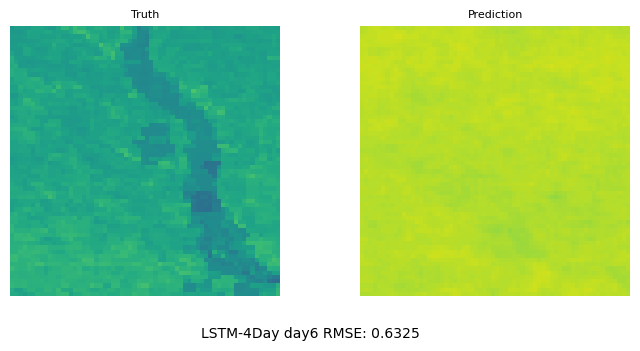

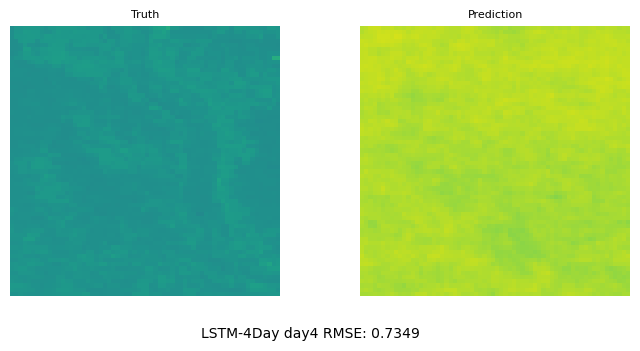

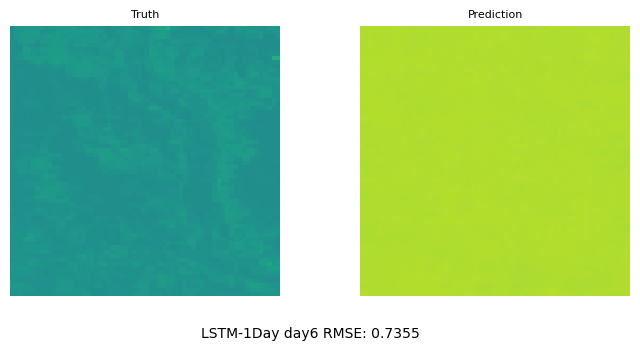

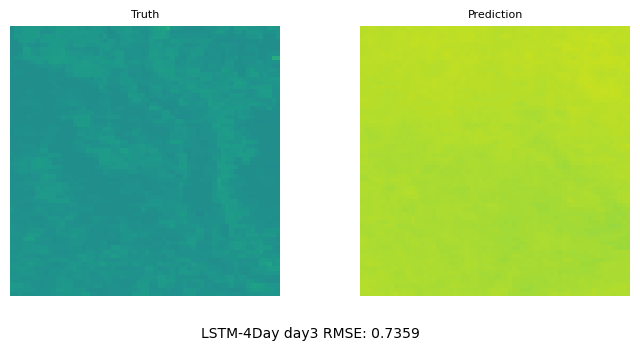

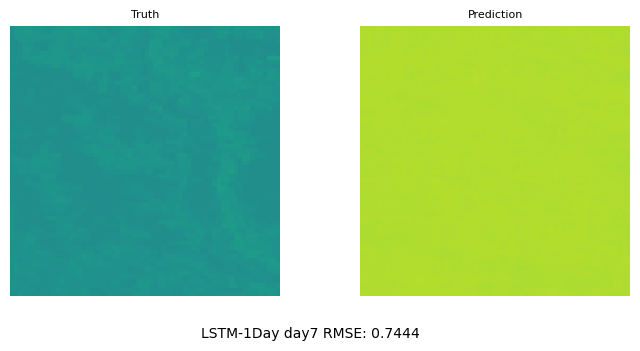

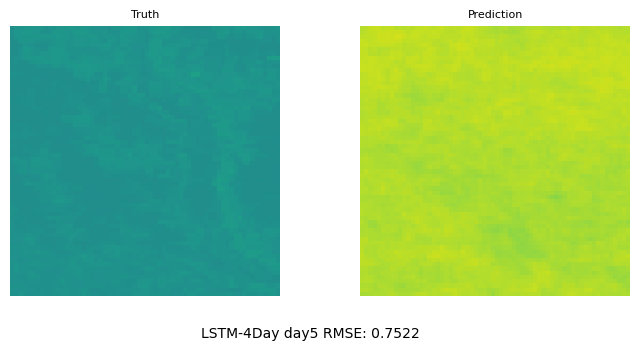

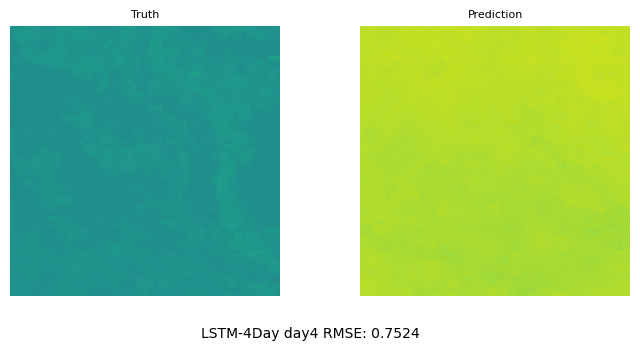

-----------------------------------------------------------------------------------------------


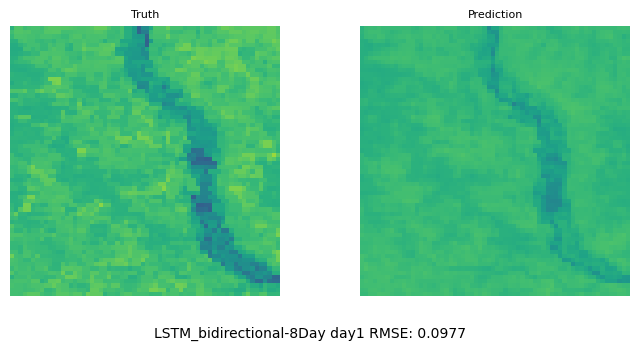

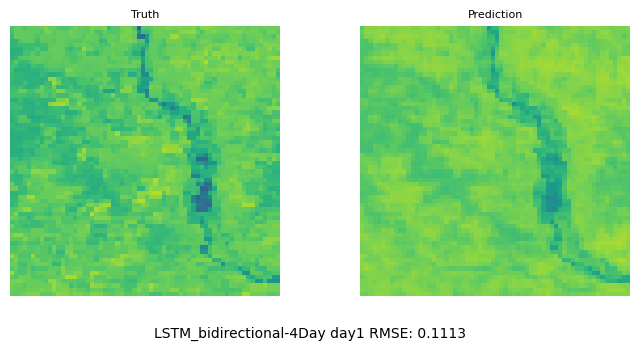

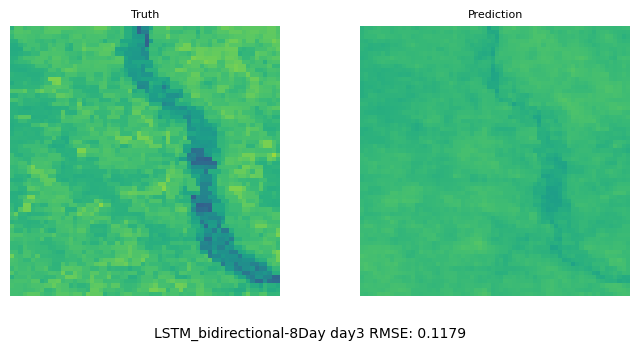

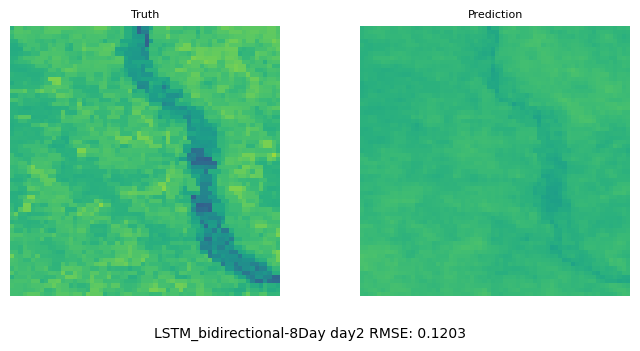

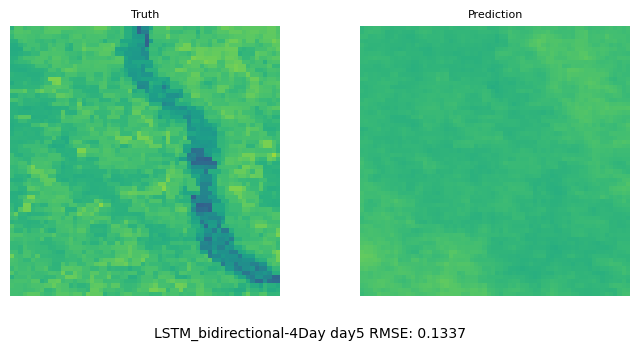

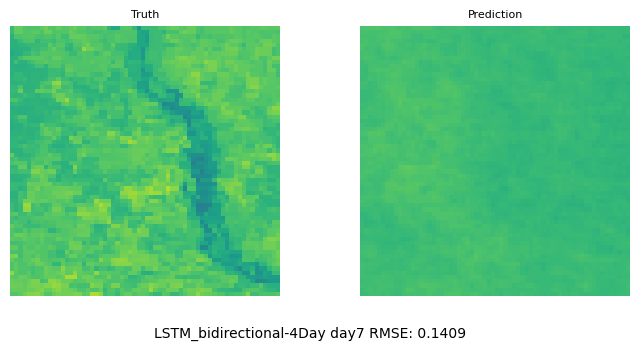

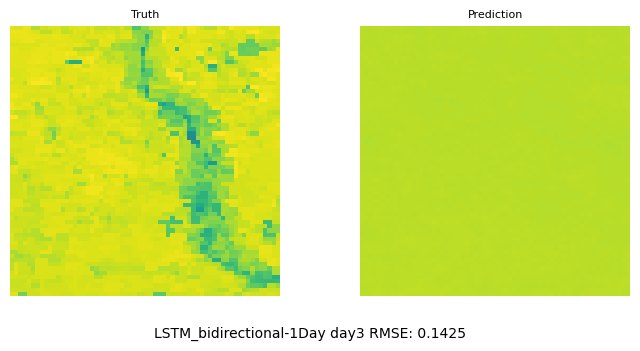

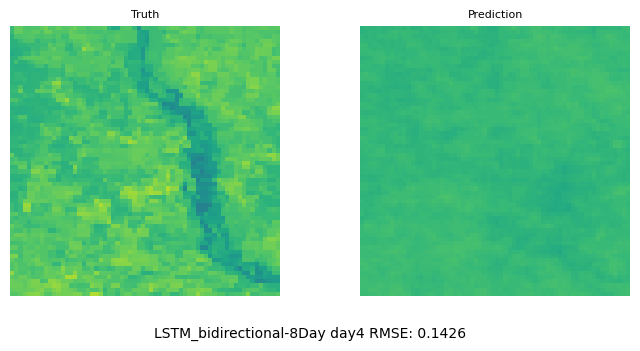

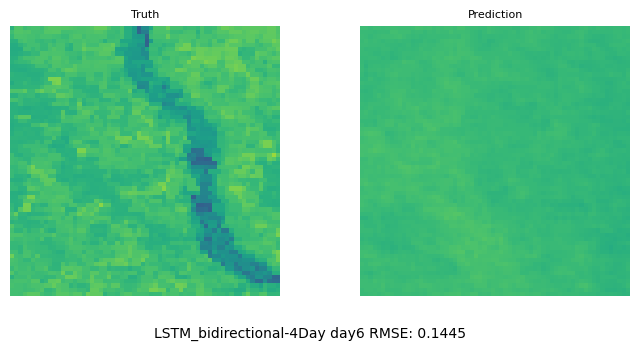

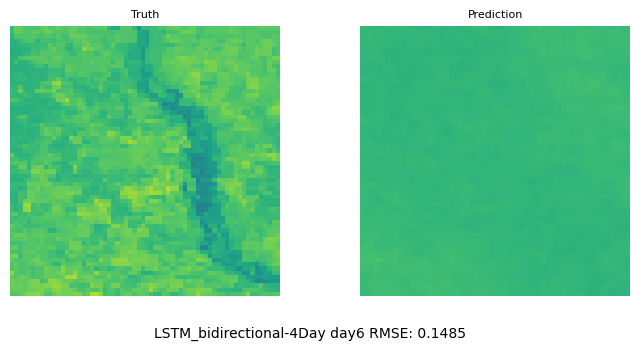

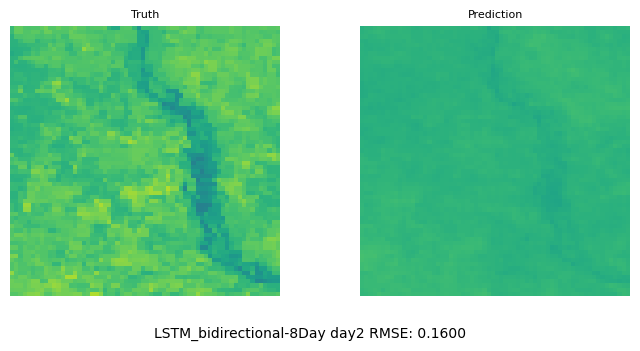

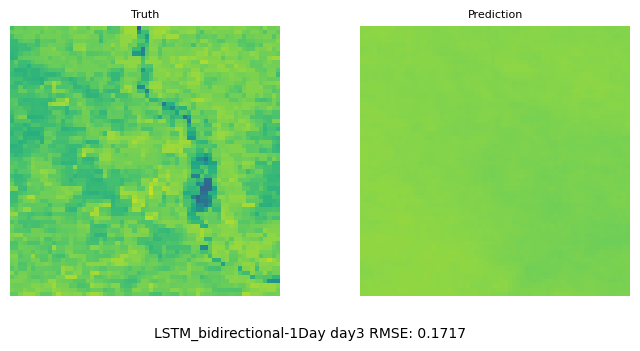

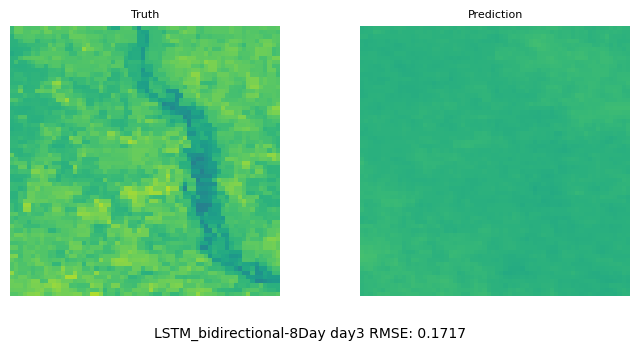

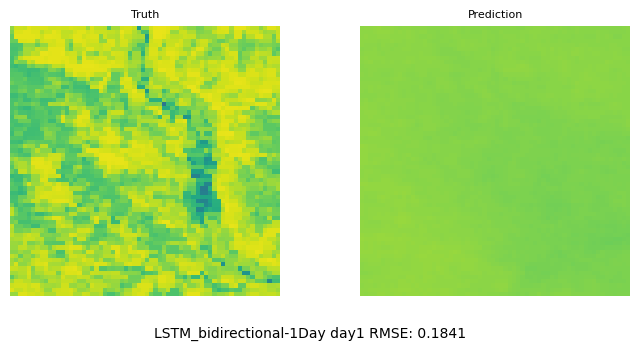

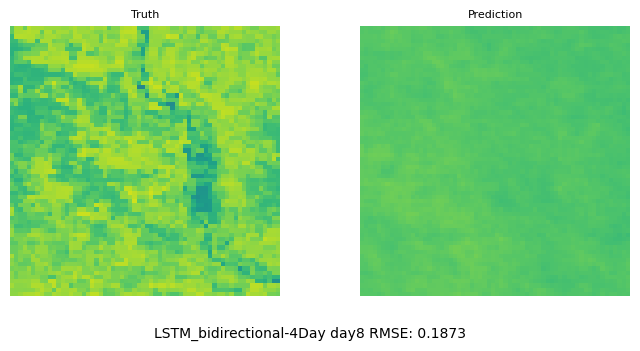

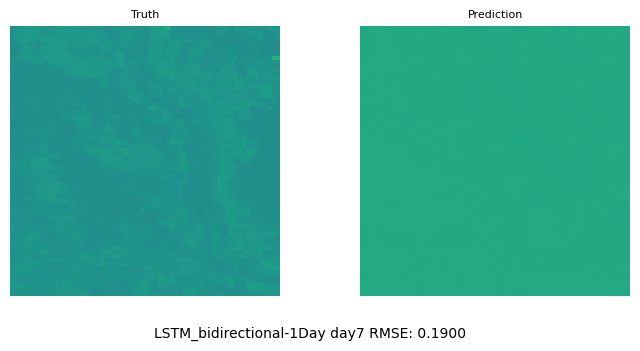

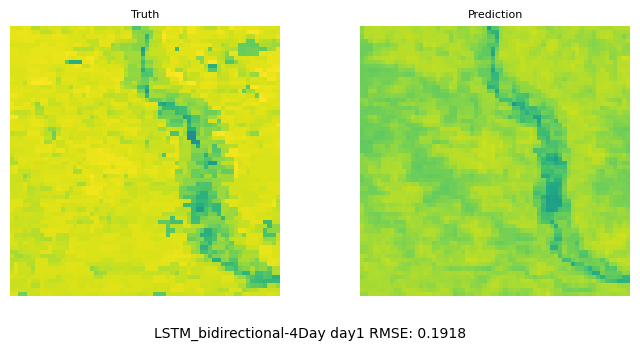

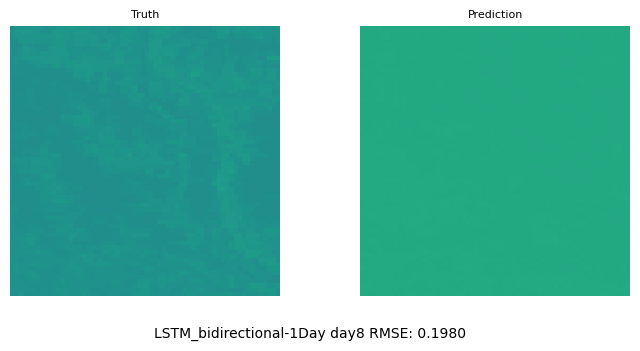

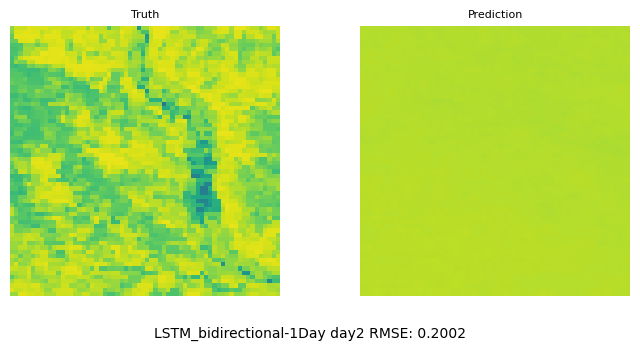

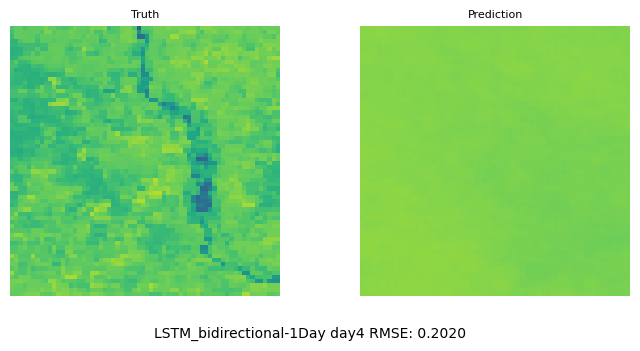

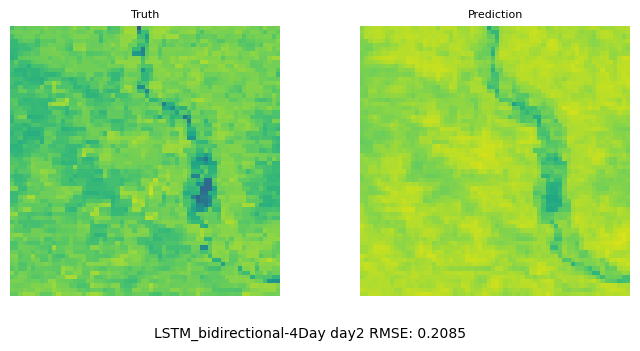

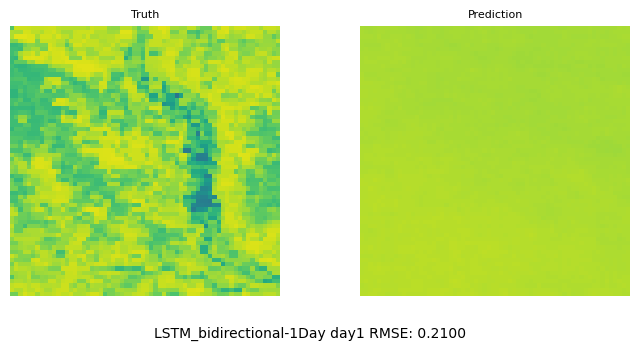

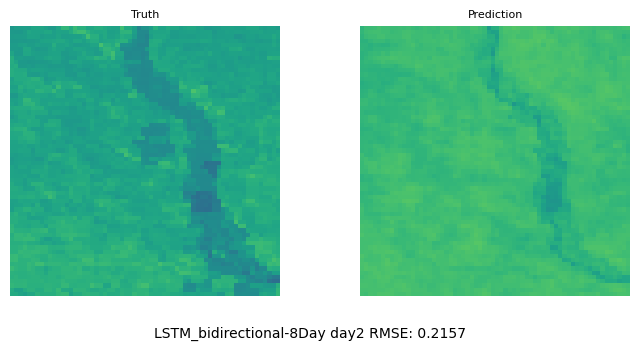

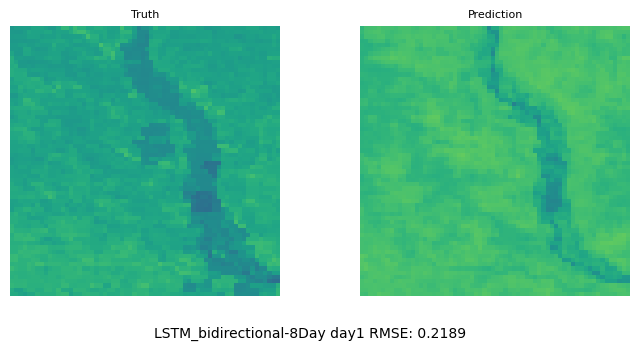

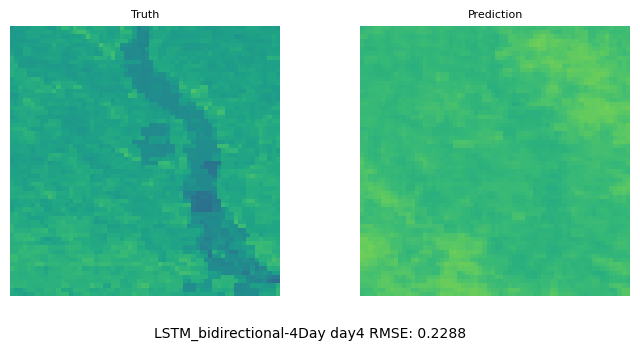

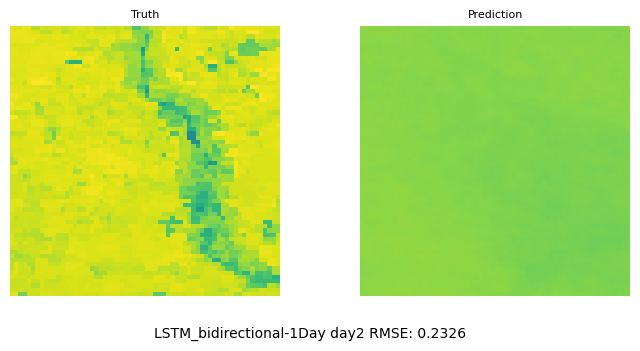

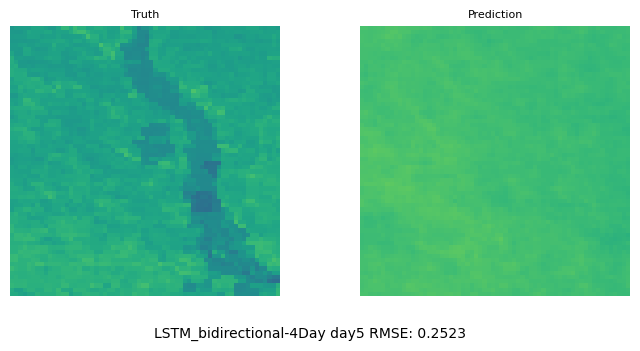

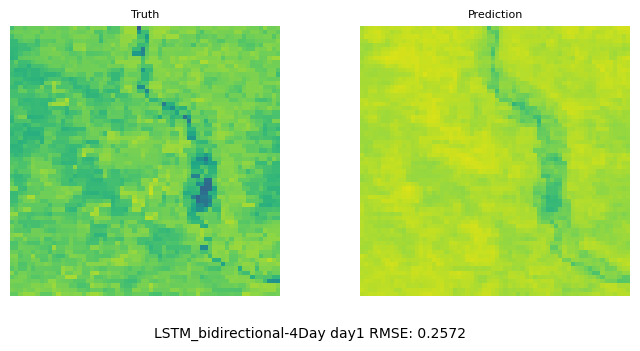

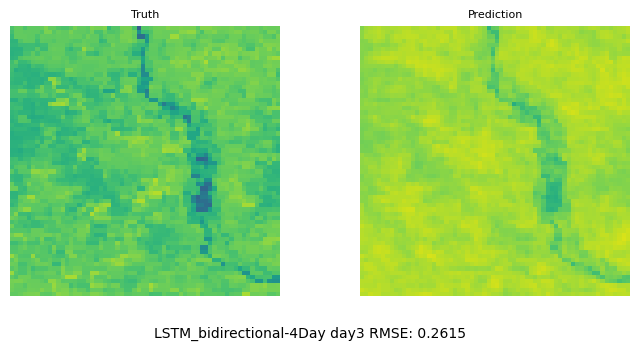

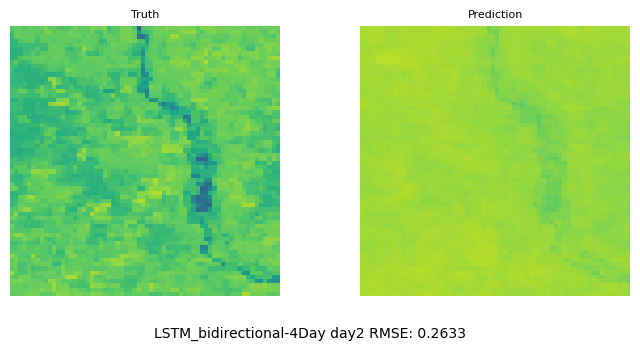

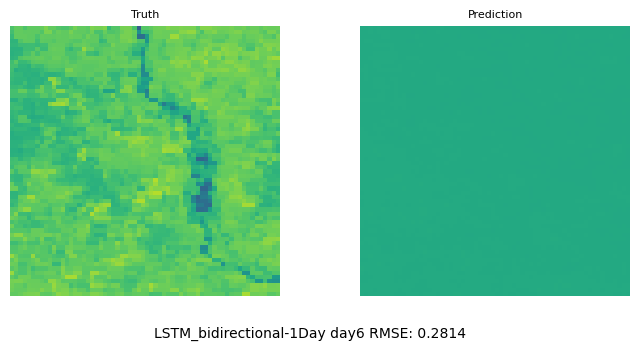

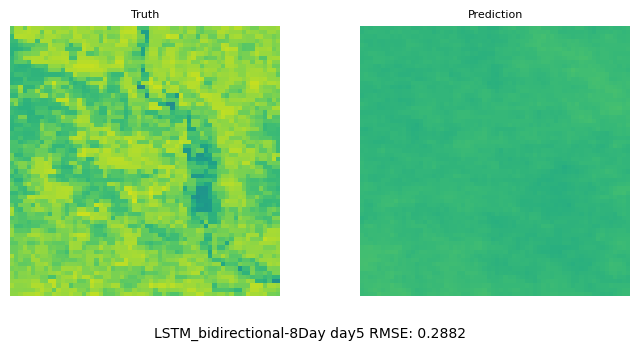

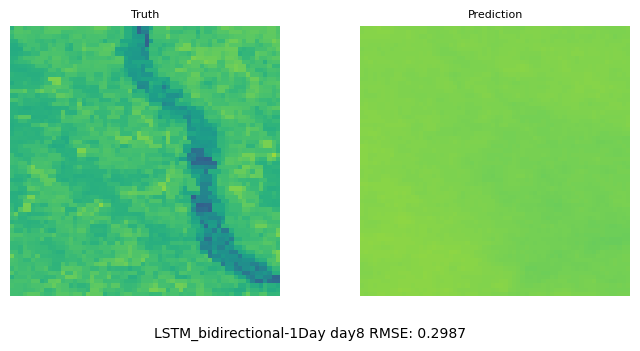

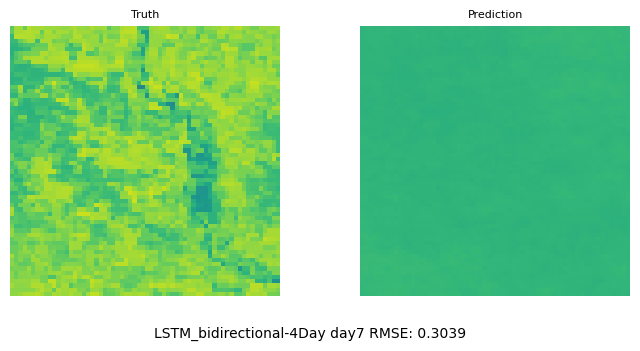

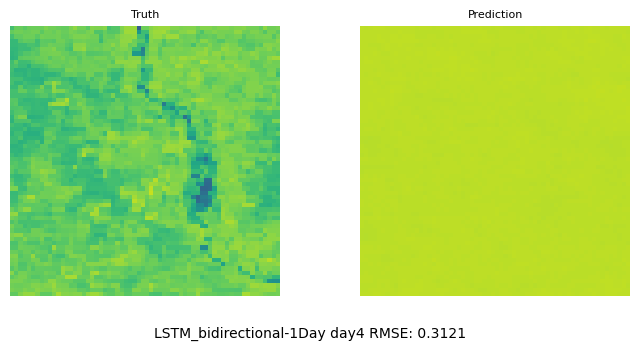

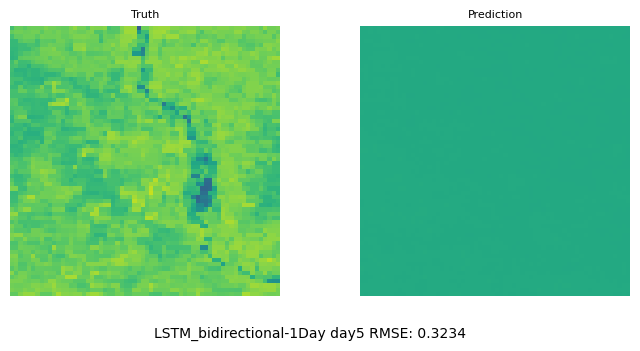

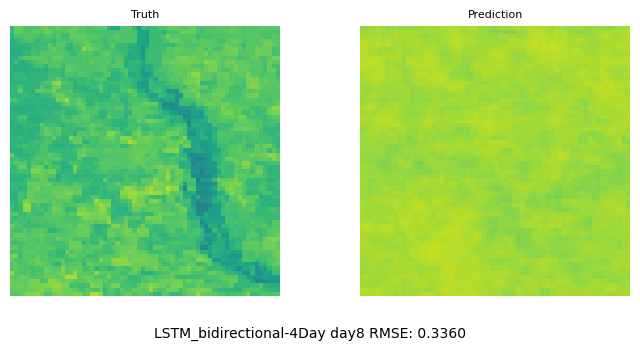

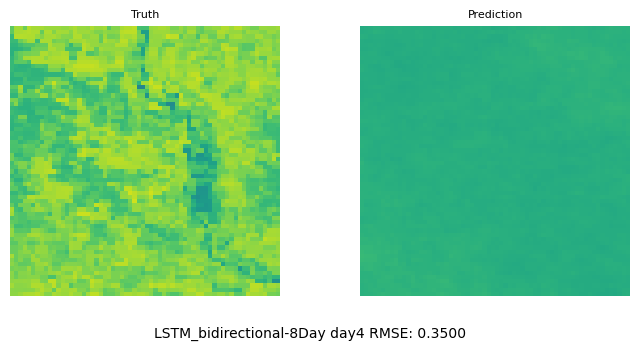

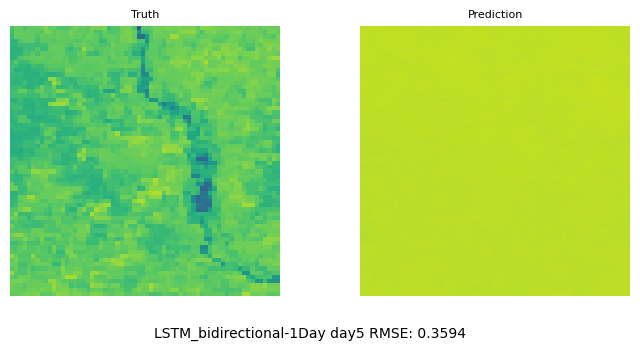

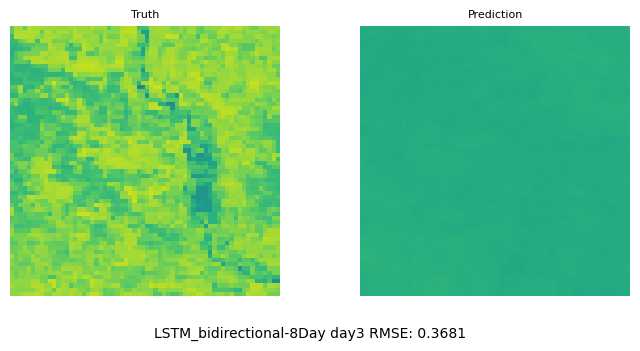

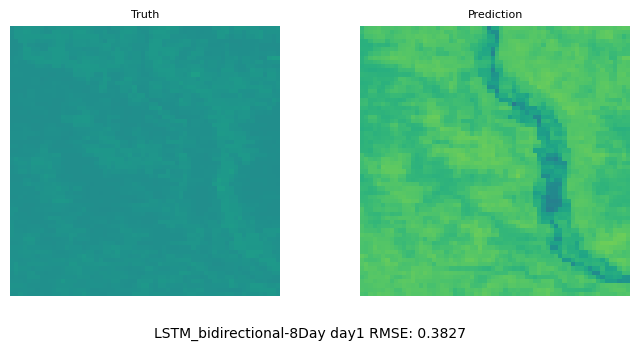

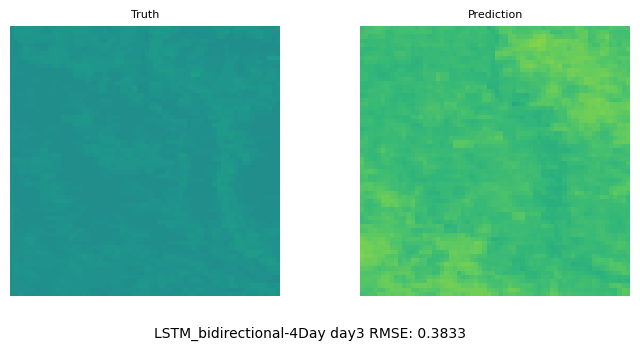

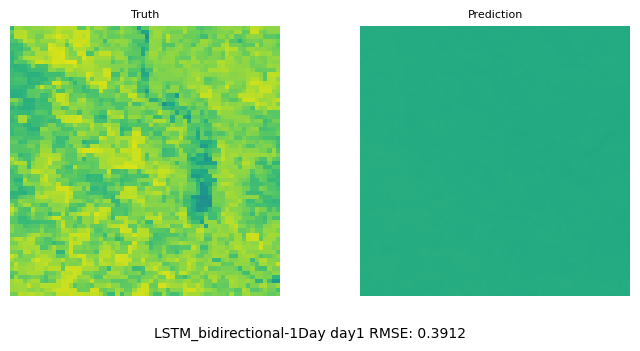

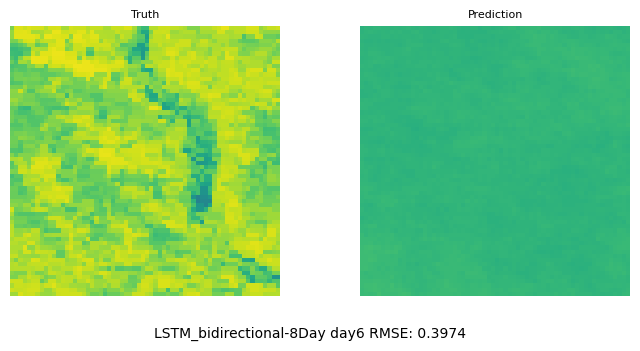

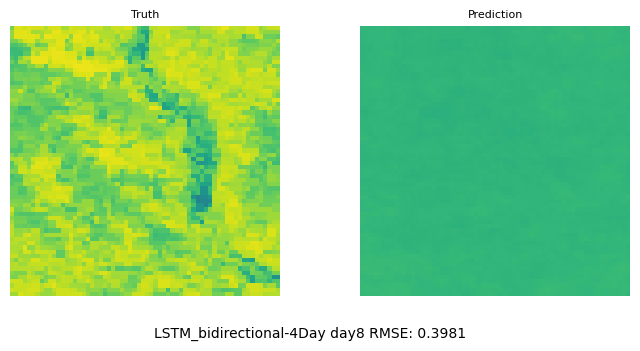

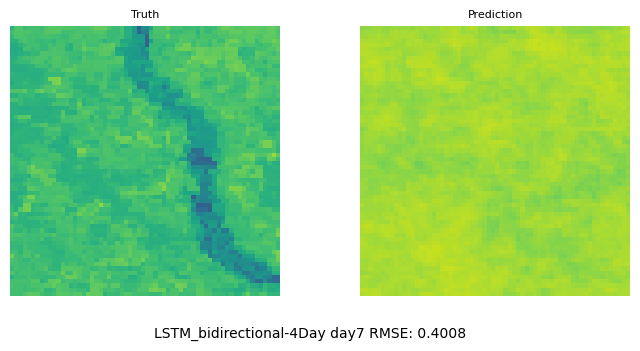

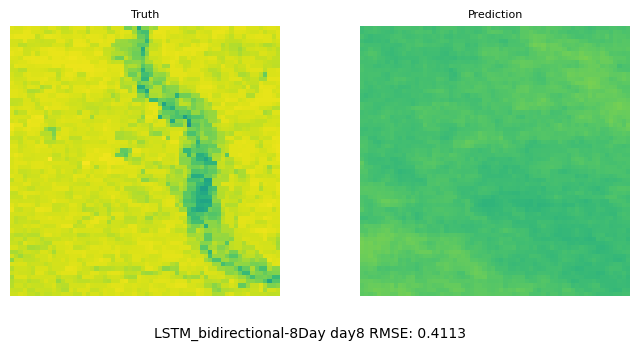

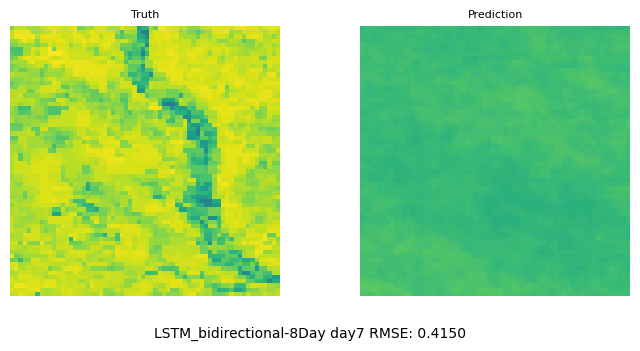

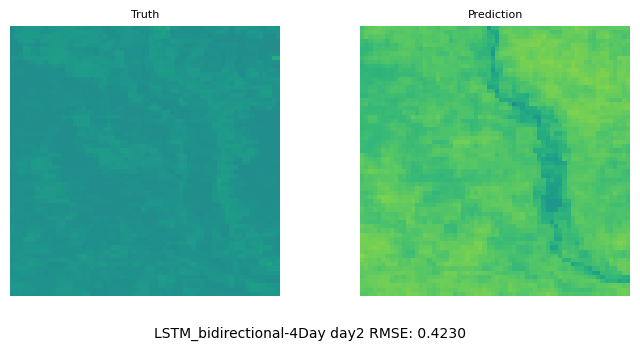

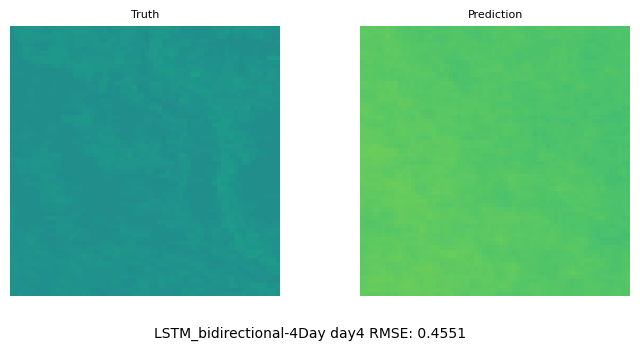

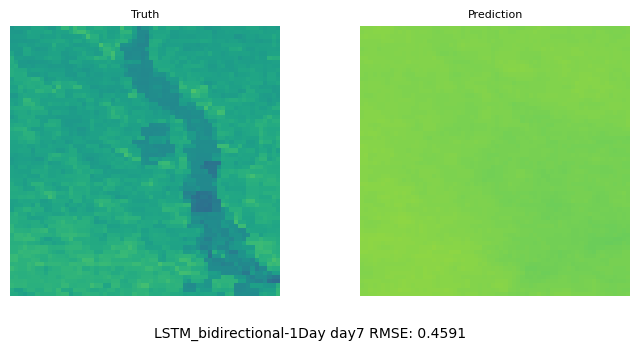

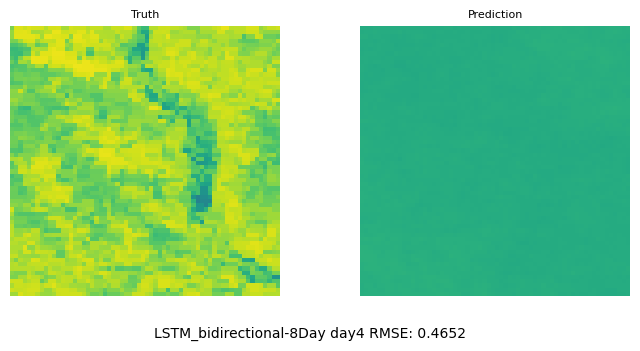

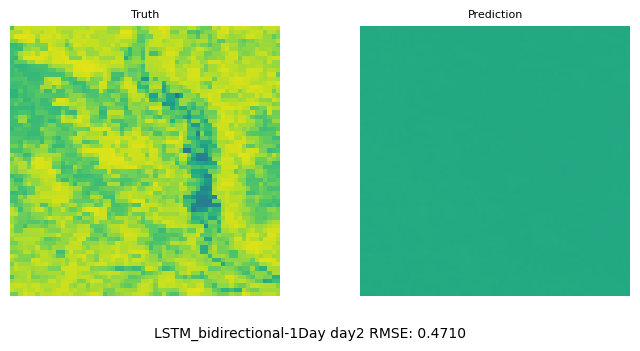

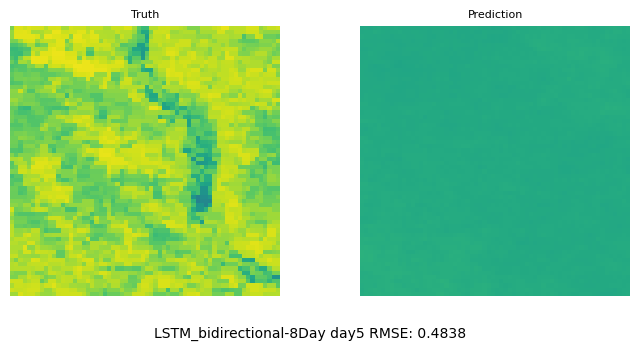

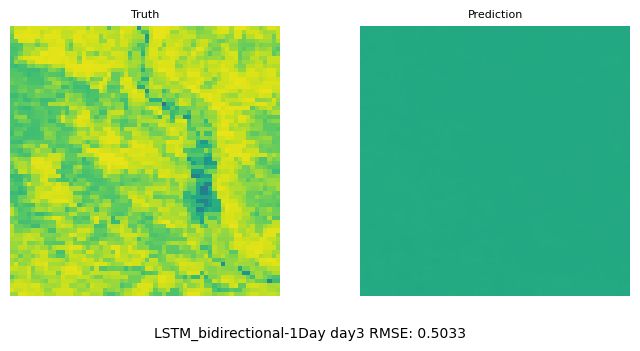

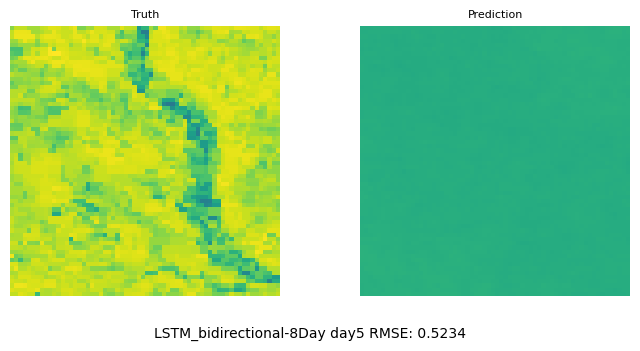

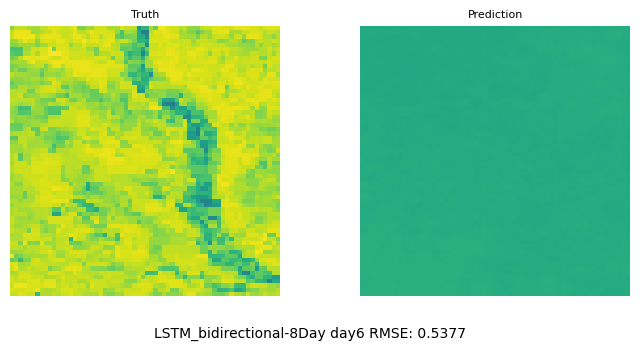

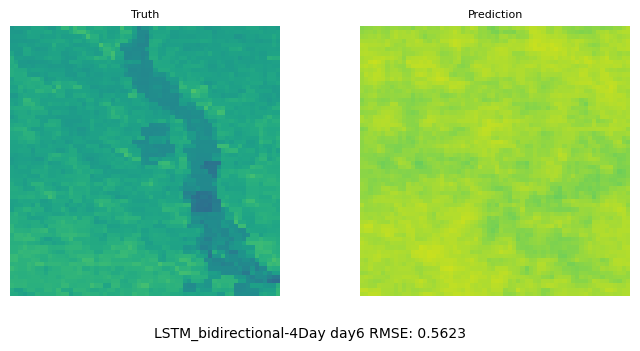

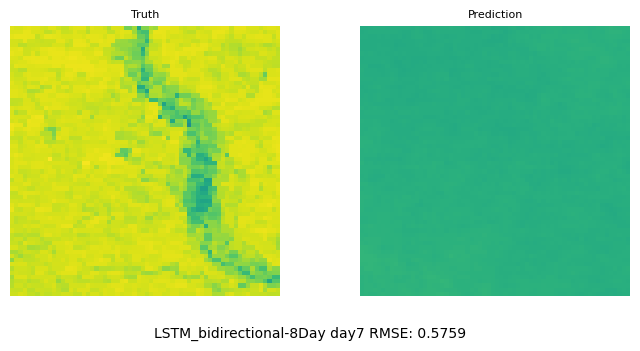

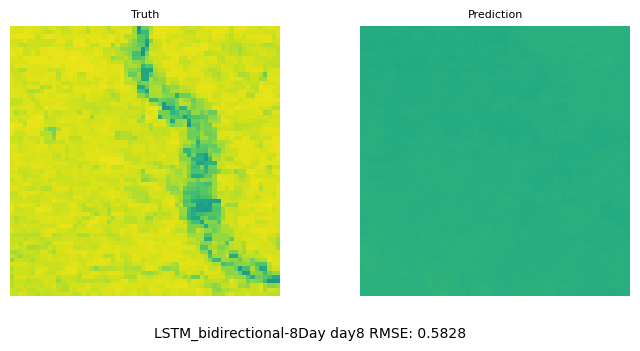

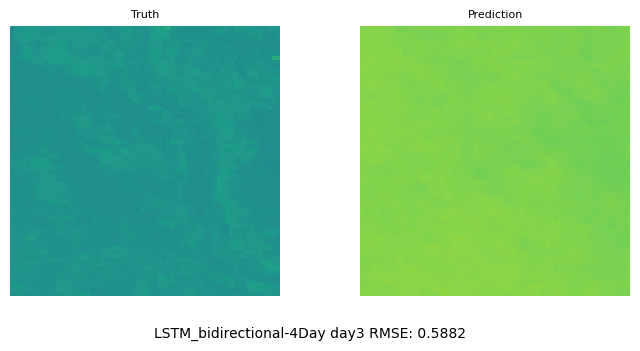

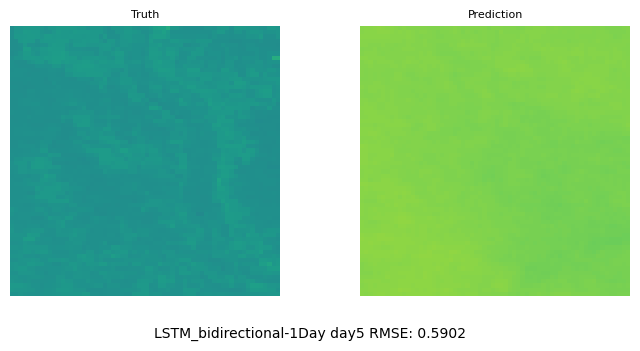

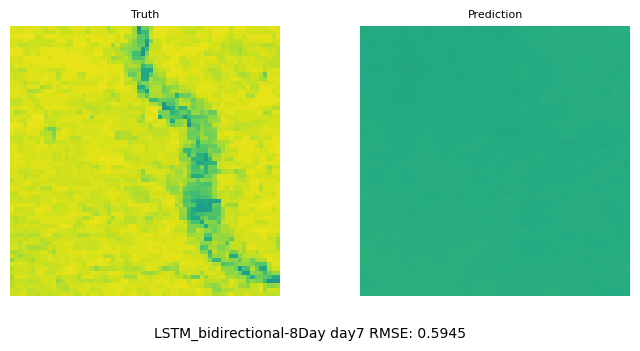

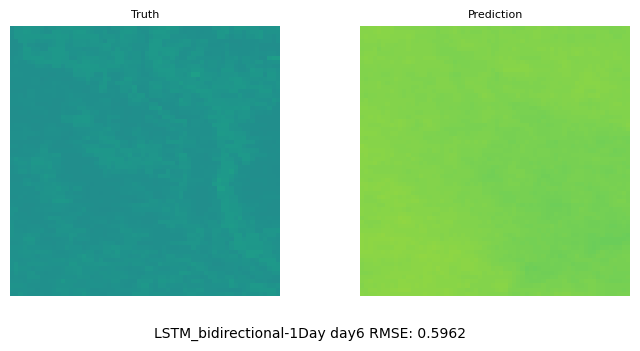

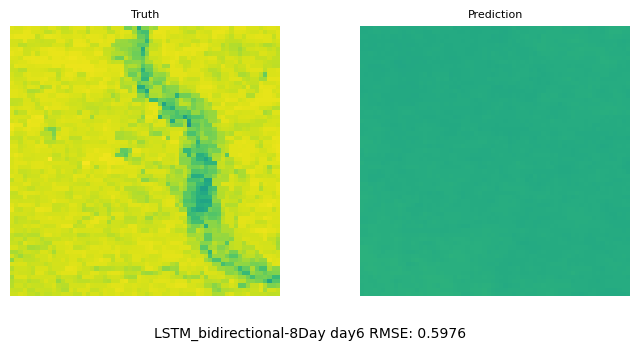

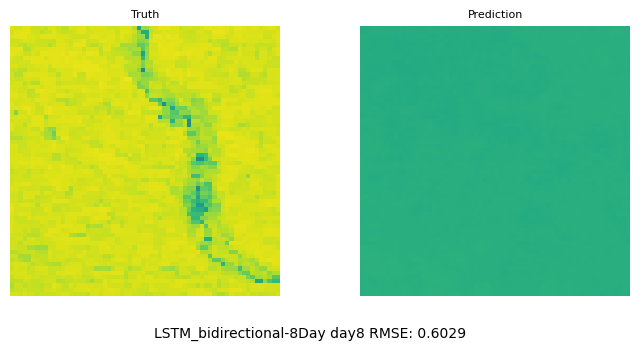

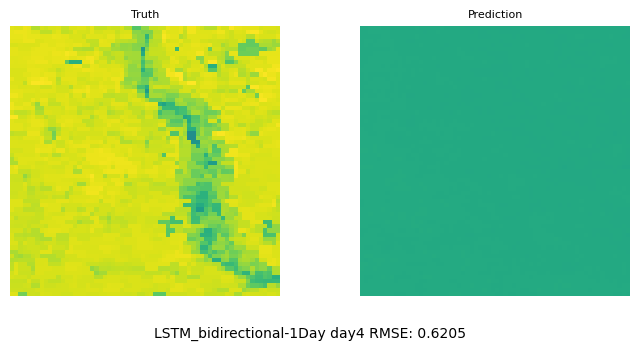

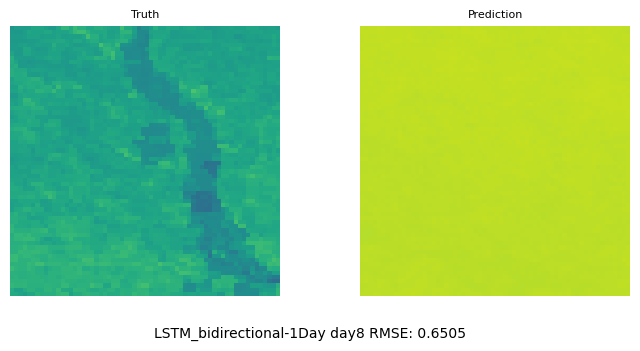

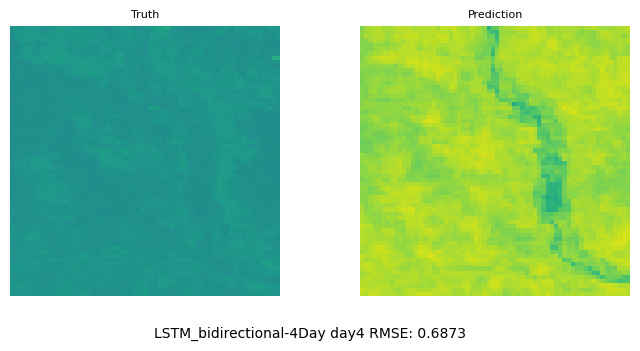

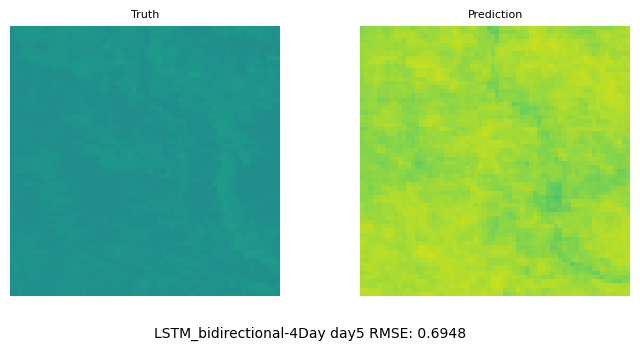

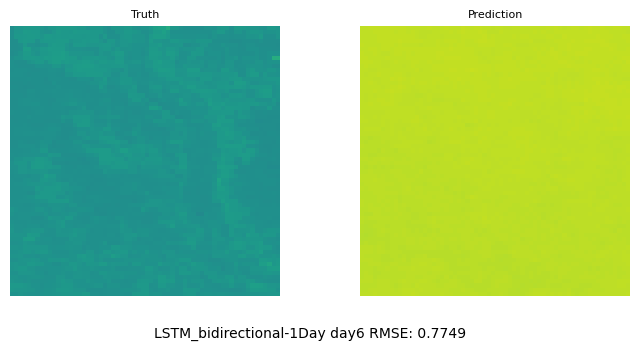

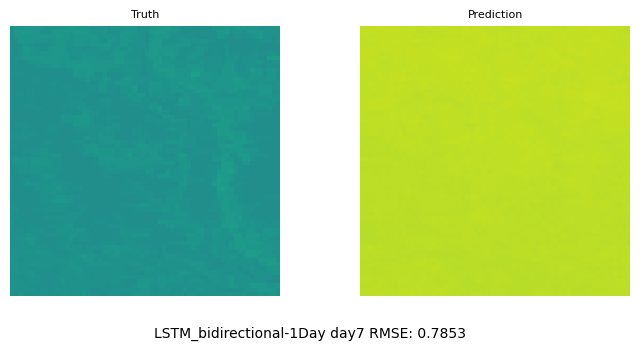

-----------------------------------------------------------------------------------------------


In [94]:
models=['CNN', 'LSTM', 'LSTM_bidirectional']
for model in models:
    show_images(model, f"/s/bach/b/class/cs535/cs535a/data/eval_results/{model}", f"/s/chopin/n/under/voleskyj/cs535_project/analysis/csvs/{model.lower()}.csv")
    print('-----------------------------------------------------------------------------------------------')